In [15]:
from soview import *
import pandas as pd
import datetime
import palettable

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [16]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp2 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
cmp_omics = palettable.colorbrewer.qualitative.Set2_7.mpl_colors
cmp_omics = [cmp_omics[3],cmp_omics[4],cmp_omics[0],cmp_omics[1],cmp_omics[2]]
# trans_color = cmp_omics[2]
# prote_color = cmp_omics[3]

In [61]:
data = pd.read_excel('demo_data_0715.xlsx',sheet_name=0)
dataset = pd.read_excel('demo_data_0715.xlsx',sheet_name=1)
biotech = pd.read_excel('demo_data_0715.xlsx',sheet_name=2)

In [40]:
dataset = dataset[dataset.Date!='None']

In [152]:
data[['Species']]

,Species
0,Mouse
1,Mouse
2,Mouse
3,Mouse
4,Mouse
...,...
2179,Human
2180,Human
2181,Human
2182,Mouse


In [155]:
data['Species'] = data['Species'].str.upper()
data['Tissue'] = data['Tissue'].str.upper()

0       MOUSE
1       MOUSE
2       MOUSE
3       MOUSE
4       MOUSE
        ...  
2179    HUMAN
2180    HUMAN
2181    HUMAN
2182    MOUSE
2183    HUMAN
Name: Species, Length: 2184, dtype: object

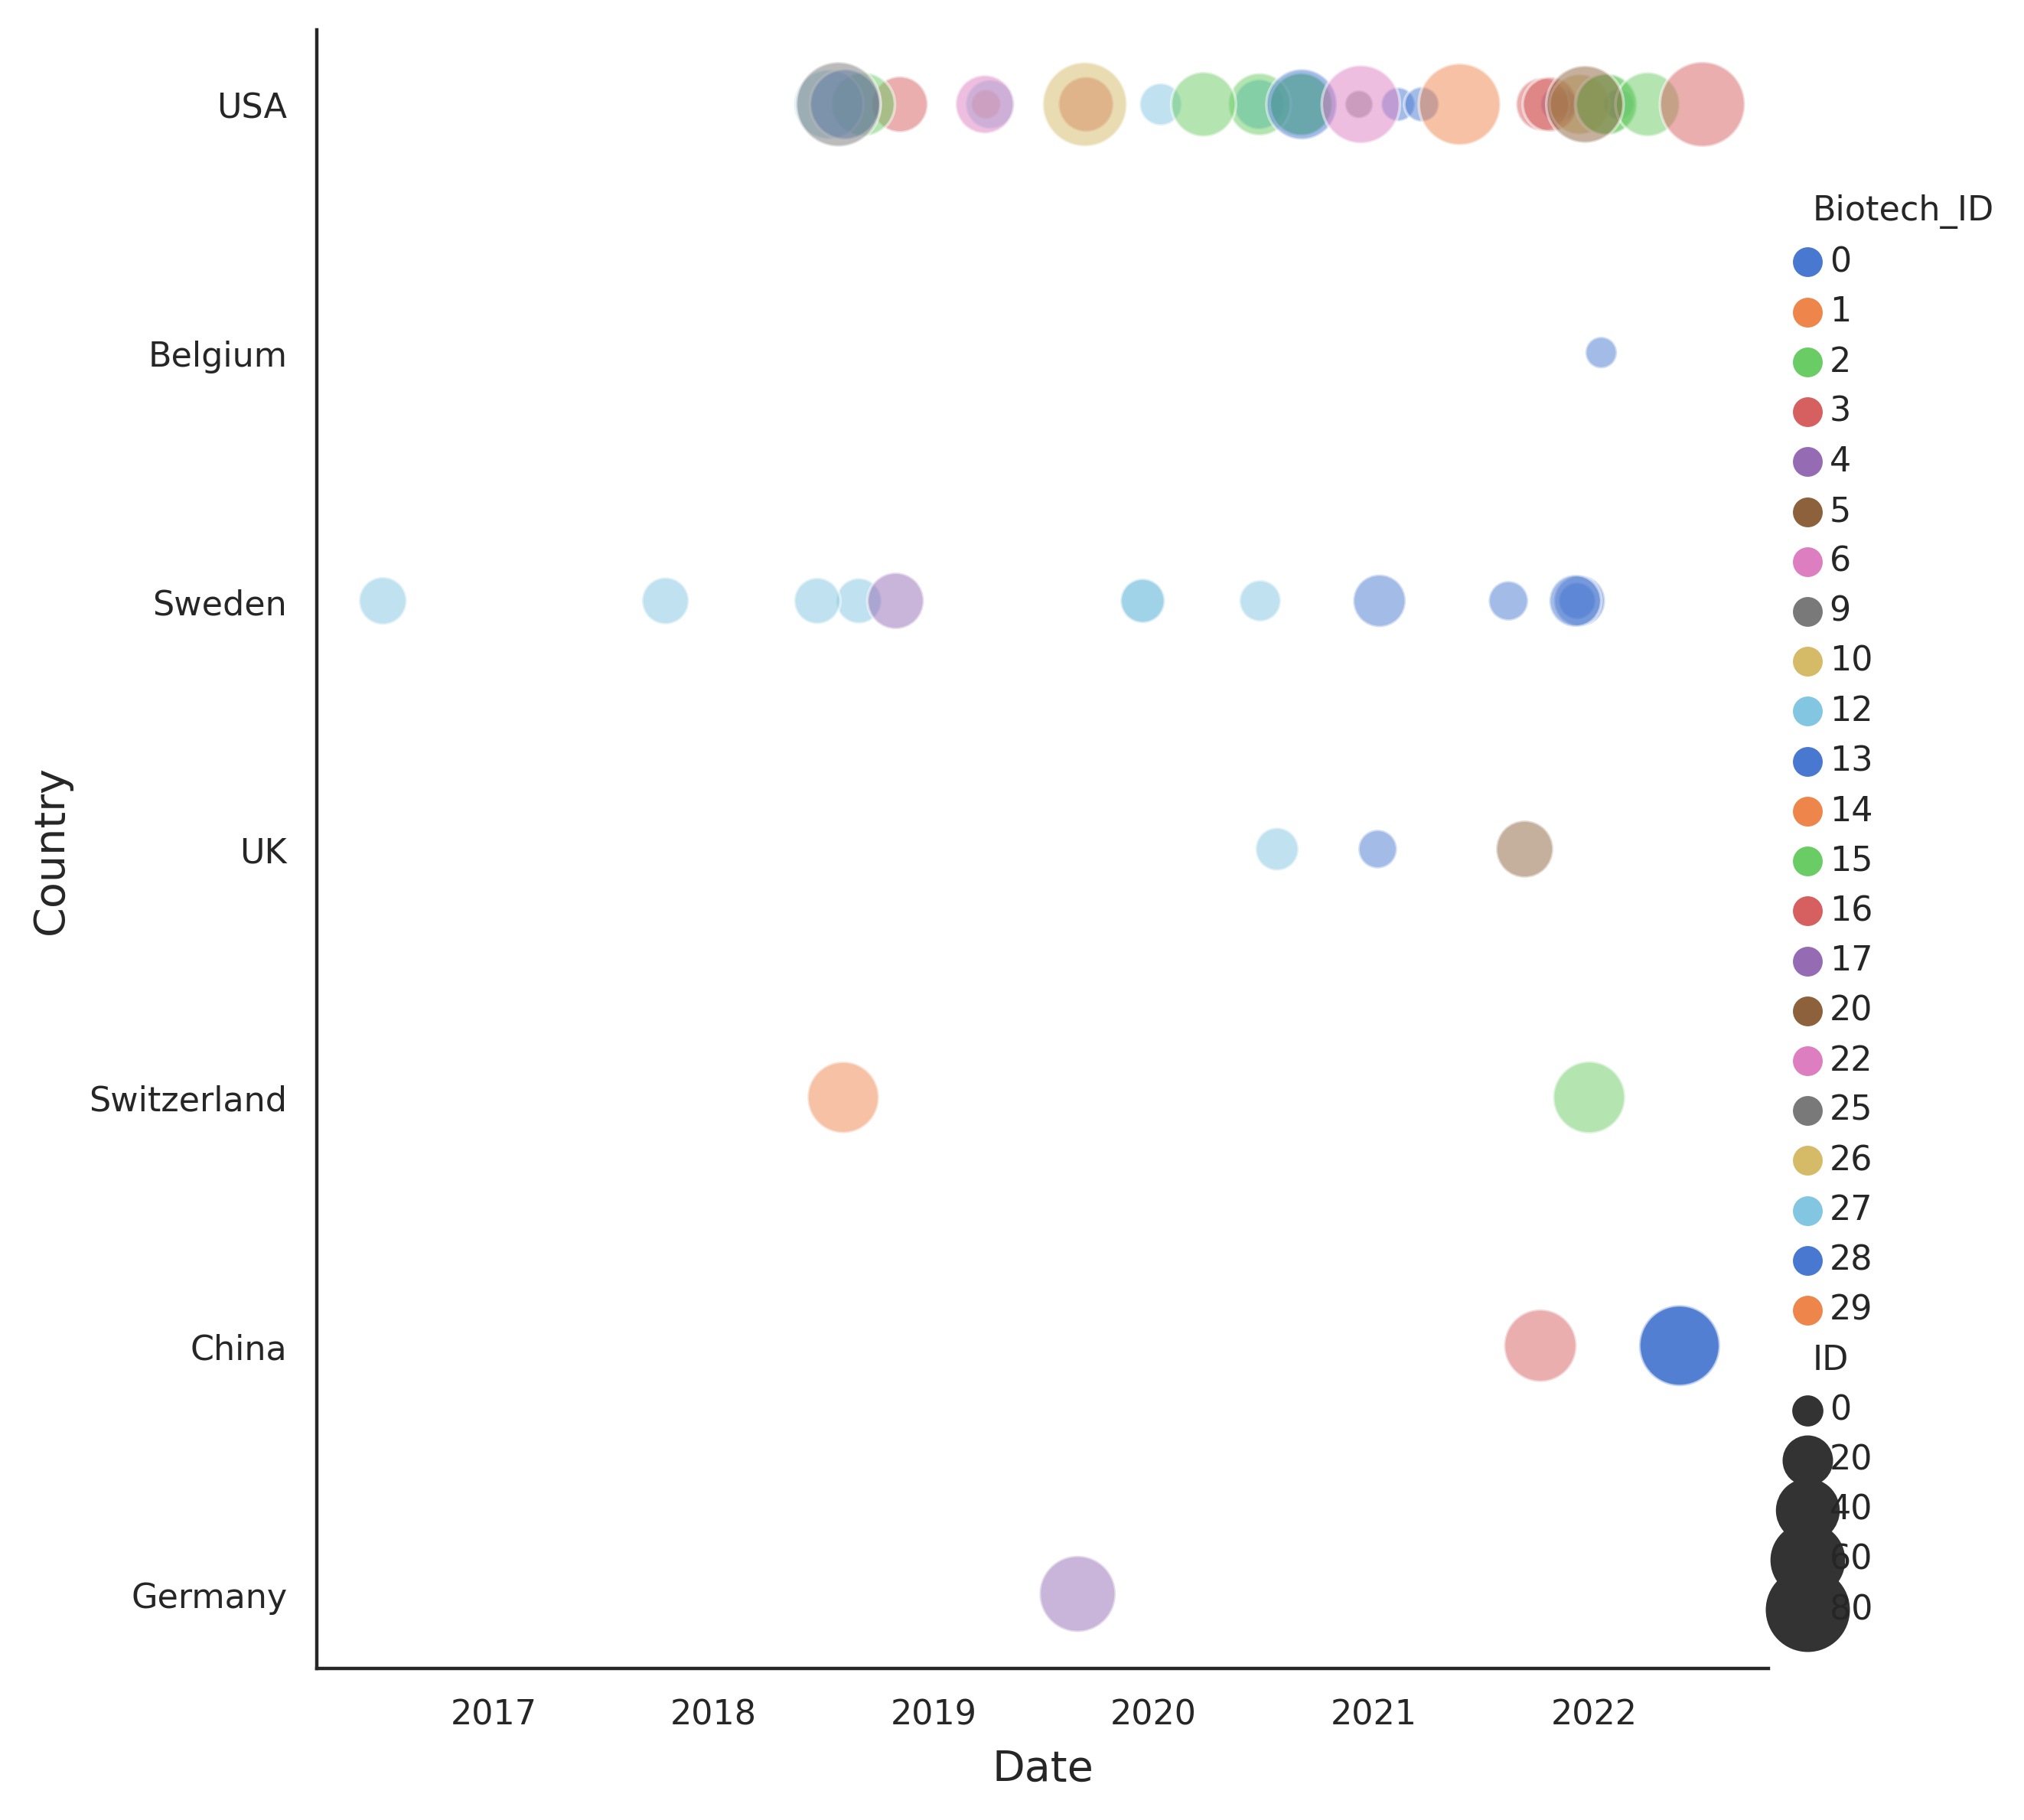

In [42]:
sns.relplot(x="Date", y="Country", hue="Biotech_ID", size="ID",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dataset)

In [73]:
dataset = dataset.set_index('ID')

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22,NaN
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22,NaN
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,1662,21890,NaN
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,936,22802,NaN
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,Mouse,Embryo,2500,22969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,14174,250,NaN
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,3512,4000,NaN
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Human,cortex,5891,250,NaN
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,Mouse,cortex,13222,242,NaN


In [51]:
dataset_data_count = data.groupby('Dataset_ID').agg('count')[['ID']]
dataset_data_count.rename(columns={'ID':'data_count'},inplace=True)

In [74]:
dataset_unit_count = data.groupby('Dataset_ID').agg('sum')[['N_Unit']]

In [101]:
dataset_genes_count = data.groupby('Dataset_ID').agg('mean')[['N_Gene']]

In [157]:
dataset_species = data.groupby('Dataset_ID').agg(pd.Series.mode)[['Species']]

In [158]:
dataset_tissue = data.groupby('Dataset_ID').agg(pd.Series.mode)[['Tissue']]

In [159]:
result = pd.concat([dataset, dataset_data_count,dataset_unit_count,dataset_genes_count,dataset_species,dataset_tissue], axis=1, join="inner")

In [181]:
result[['N_Unit_log']] = np.log10(result[['N_Unit']])
result[['N_Gene_log']] = np.log10(result[['N_Gene']])

In [161]:
result

,Name_Short,Name_Long,Biotech_ID,doi,Date,Country,Journal,Author,Access,Zip_Path,data_count,N_Unit,N_Gene,Species,Tissue
0,chen2021dissecting,Dissecting mammalian spermatogenesis using spa...,25,https://doi.org/10.1016/j.celrep.2021.109915,2021-11-04 00:00:00,USA,Cell Reports,"Chen, H.\nMurray, E.\nSinha, A.\nLaumas, A.\nL...",https://www.dropbox.com/s/ygzpj0d0oh67br0/Test...,demo_data/zip/chen2021dissecting.zip,6,207335,24015.500000,MOUSE,TESTIS
1,stickels2020highly,Highly sensitive spatial transcriptomics at ne...,25,10.1038/s41587-020-0739-1,2020-12-07 00:00:00,USA,Nature Biotechnology,"Stickels, Robert R.\nMurray, Evan\nKumar, Pawa...",https://singlecell.broadinstitute.org/single_c...,demo_data/zip/maynard2021transcriptome.zip,6,232963,19429.833333,MOUSE,HIPPOCAMPUS
2,rodriques2019slide,Slide-seq: A scalable technology for measuring...,1,10.1126/science.aaw1219,2019-03-29 00:00:00,USA,Science,"Rodriques, S. G.\nStickels, R. R.\nGoeva, A.\n...",https://portals.broadinstitute.org/single_ cel...,demo_data/zip/hunter2021spatially.zip,96,2558150,17349.645833,MOUSE,[]
3,parigi2022the,The spatial transcriptomic landscape of the he...,0,10.1038/s41467-022-28497-0,2022-02-11 00:00:00,USA,Nature Communications,"Parigi, Sara M.\nLarsson, Ludvig\nDas, Srustid...",GSE190595,demo_data/zip/keren2018structured.zip,4,13715,31053.000000,MOUSE,INTESTINE
4,guilliams2022spatial,Spatial proteogenomics reveals distinct and ev...,0,10.1016/j.cell.2021.12.018,2022-01-13 00:00:00,Belgium,Cell,"Guilliams, M.\nBonnardel, J.\nHaest, B.\nVande...",GSE192742,NaN,15,24179,31614.666667,MOUSE,LIVER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,MALDI_kidney,MALDI data from METASPACE (mouse kidney),17,None,None,Germany,None,None,METASPACE,NaN,1,45500,750.000000,MOUSE,KIDNEY
89,MALDI_seed,MALDI data from METASPACE (mouse seed),17,None,None,Germany,None,Dhaka Bhandari,METASPACE,NaN,1,64000,901.000000,NONE,SEED
90,Vickovic2019high,High-definition spatial transcriptomics for in...,26,10.1038/s41592-019-0548-y,2019-09-09 00:00:00,USA,Nature Methods,"Vickovic, S.\nEraslan, G.\nSalmen, F.\nKlugham...",https://portals.broadinstitute.org/single_cell...,NaN,3,417736,16050.333333,MOUSE,OLFACTORY BULB
91,Wang2018three,Three-dimensional intact-tissue sequencing of ...,9,DOI: 10.1126/science.aat5691,2018-07-27 00:00:00,USA,Science,"Wang, X.\nAllen, W. E.\nWright, M. A.\nSylwest...",https://www.starmapresources.com/data,NaN,28,238037,28.000000,MOUSE,VISUAL CORTEX


In [163]:
result = result[result.Date!='None']

In [164]:
biotech = biotech[biotech.ID.notna()]

AttributeError: 'DataFrame' object has no attribute 'ID'

In [122]:
biotech[['ID']] = biotech[['ID']].astype('int')
biotech=biotech.set_index('ID')

/root/anaconda3/envs/SOView/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [127]:
biotech

,Name,Type,Image
ID,,,
0,10X Visium,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/10X_Visium/i...
1,Slide-seq,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/Slide-seq/in...
2,MIBI,Spatial Proteomics,demo_data/Spatial_Proteomics/MIBI/info/biotech...
3,MERFISH,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/MERFISH/info...
4,osmFISH,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/osmFISH/info...
5,seqFISH,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/seqFISH/info...
6,seqFISH+,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/seqFISH+/inf...
8,seqScope,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/seqScope/inf...
9,STARmap,Spatial Transcriptomics,demo_data/Spatial_Transcriptomics/STARmap/info...


In [128]:
biotech_name = [biotech.loc[i]['Name'] for i in result['Biotech_ID']]
biotech_type = [biotech.loc[i]['Type'] for i in result['Biotech_ID']]


# biotech.loc[1]

In [132]:
len(biotech_name)

59

In [165]:
result['biotech_name'] = np.array(biotech_name)
result['biotech_type'] = np.array(biotech_type)

/tmp/ipykernel_27353/3155548317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['biotech_name'] = np.array(biotech_name)
/tmp/ipykernel_27353/3155548317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['biotech_type'] = np.array(biotech_type)


In [166]:
result

,Name_Short,Name_Long,Biotech_ID,doi,Date,Country,Journal,Author,Access,Zip_Path,data_count,N_Unit,N_Gene,Species,Tissue,N_Unit_log,N_Gene_log,biotech_name,biotech_type
0,chen2021dissecting,Dissecting mammalian spermatogenesis using spa...,25,https://doi.org/10.1016/j.celrep.2021.109915,2021-11-04 00:00:00,USA,Cell Reports,"Chen, H.\nMurray, E.\nSinha, A.\nLaumas, A.\nL...",https://www.dropbox.com/s/ygzpj0d0oh67br0/Test...,demo_data/zip/chen2021dissecting.zip,6,207335,24015.500000,MOUSE,TESTIS,12.242091,10.086455,Slide-seqV2,Spatial Transcriptomics
1,stickels2020highly,Highly sensitive spatial transcriptomics at ne...,25,10.1038/s41587-020-0739-1,2020-12-07 00:00:00,USA,Nature Biotechnology,"Stickels, Robert R.\nMurray, Evan\nKumar, Pawa...",https://singlecell.broadinstitute.org/single_c...,demo_data/zip/maynard2021transcriptome.zip,6,232963,19429.833333,MOUSE,HIPPOCAMPUS,12.358635,9.874565,Slide-seqV2,Spatial Transcriptomics
2,rodriques2019slide,Slide-seq: A scalable technology for measuring...,1,10.1126/science.aaw1219,2019-03-29 00:00:00,USA,Science,"Rodriques, S. G.\nStickels, R. R.\nGoeva, A.\n...",https://portals.broadinstitute.org/single_ cel...,demo_data/zip/hunter2021spatially.zip,96,2558150,17349.645833,MOUSE,[],14.754795,9.761327,Slide-seq,Spatial Transcriptomics
3,parigi2022the,The spatial transcriptomic landscape of the he...,0,10.1038/s41467-022-28497-0,2022-02-11 00:00:00,USA,Nature Communications,"Parigi, Sara M.\nLarsson, Ludvig\nDas, Srustid...",GSE190595,demo_data/zip/keren2018structured.zip,4,13715,31053.000000,MOUSE,INTESTINE,9.526245,10.343451,10X Visium,Spatial Transcriptomics
4,guilliams2022spatial,Spatial proteogenomics reveals distinct and ev...,0,10.1016/j.cell.2021.12.018,2022-01-13 00:00:00,Belgium,Cell,"Guilliams, M.\nBonnardel, J.\nHaest, B.\nVande...",GSE192742,NaN,15,24179,31614.666667,MOUSE,LIVER,10.093240,10.361376,10X Visium,Spatial Transcriptomics
6,maynard2021trans,Transcriptome-scale spatial gene expression in...,0,10.1038/s41593-020-00787-0,2021-02-10 00:00:00,USA,Nature Neuroscience,"Maynard, K. R.\nCollado-Torres, L.\nWeber, L. ...",http://spatial.libd.org/spatialLIBD/,NaN,12,47681,33538.000000,HUMAN,BRAIN,10.772288,10.420434,10X Visium,Spatial Transcriptomics
7,mantri2021spatiotemporal,Spatiotemporal single-cell RNA sequencing of d...,0,10.1038/s41467-021-21892-z,2021-03-21 00:00:00,USA,Nature Communications,"Mantri, M.\nScuderi, G. J.\nAbedini-Nassab, R....",GSE149457,NaN,4,6596,24356.000000,CHICKEN,HEART,8.794219,10.100534,10X Visium,Spatial Transcriptomics
8,hunter2021spatially,Spatially resolved transcriptomics reveals the...,0,10.1038/s41467-021-26614-z,2021-11-03 00:00:00,USA,Nature Communications,"Hunter, M. V.\nMoncada, R.\nWeiss, J. M.\nYana...",GSE159709,NaN,3,7281,32268.000000,ZEBRAFISH,MELANOMA,8.893023,10.381831,10X Visium,Spatial Transcriptomics
9,hildebrandt2021spatial,Spatial Transcriptomics to define transcriptio...,0,10.1038/s41467-021-27354-w,2021-12-04 00:00:00,Sweden,Nature Communications,"Hildebrandt, F.\nAndersson, A.\nSaarenpaa, S.\...",https://zenodo.org/record/5595907#.Yk2WZJpByNg,NaN,12,8746,9655.000000,MOUSE,LIVER,9.076352,9.175231,10X Visium,Spatial Transcriptomics
11,fawkner2021spatiotemporal,Spatiotemporal analysis of human intestinal de...,0,10.1016/j.cell.2020.12.016,2021-01-07 00:00:00,UK,Cell,"Fawkner-Corbett, D.\nAntanaviciute, A.\nParikh...",GSE158328,NaN,8,21192,33538.000000,HUMAN,INTESTINE,9.961379,10.420434,10X Visium,Spatial Transcriptomics


In [167]:
data_count_trun_100 = np.clip(result[['data_count']],0,100)

result[['data_count_trun_100']] =  data_count_trun_100

/root/anaconda3/envs/SOView/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [172]:
result = result.reset_index()

In [178]:
result = result.drop('Tissue', axis=1)

In [182]:
result.to_feather('dataset.feather')

In [191]:
np.unique(result['Species'])

array(['ARABIDOPSIS', 'CELL LINE', 'CHICKEN', 'DROSOPHILA', 'HUMAN',
       'MOUSE', 'ZEBRAFISH'], dtype=object)

In [192]:
cmp

[(0.4980392156862745, 0.23529411764705882, 0.5529411764705883),
 (0.06666666666666667, 0.6470588235294118, 0.4745098039215686),
 (0.2235294117647059, 0.4117647058823529, 0.6745098039215687),
 (0.9490196078431372, 0.7176470588235294, 0.00392156862745098),
 (0.9058823529411765, 0.24705882352941178, 0.4549019607843137),
 (0.5019607843137255, 0.7294117647058823, 0.35294117647058826),
 (0.9019607843137255, 0.5137254901960784, 0.06274509803921569),
 (0.0, 0.5254901960784314, 0.5843137254901961),
 (0.8117647058823529, 0.10980392156862745, 0.5647058823529412),
 (0.9764705882352941, 0.4823529411764706, 0.4470588235294118)]

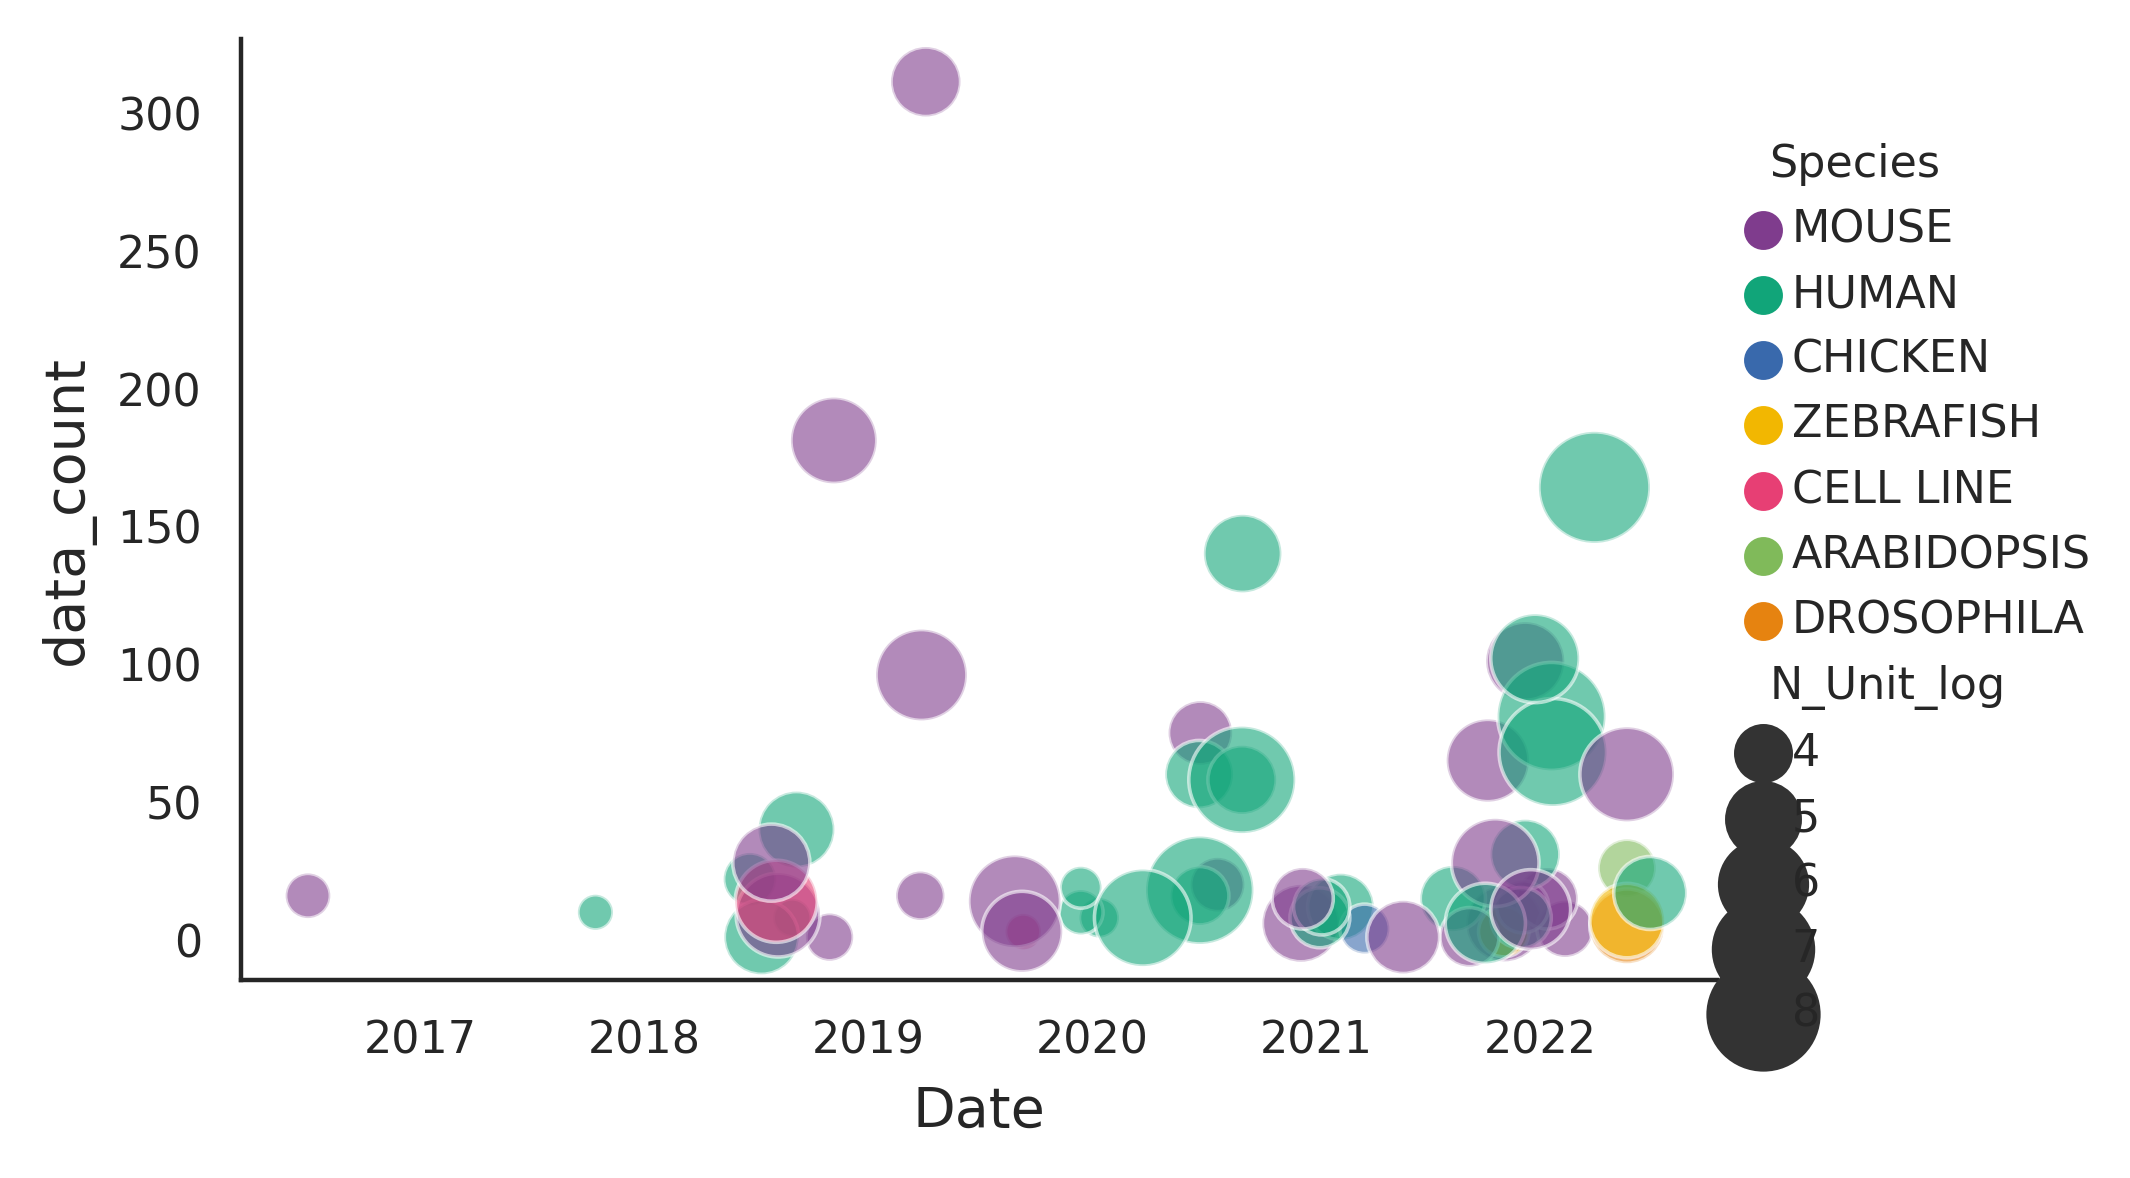

In [225]:
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y="data_count", 


            # y="biotech_name", 


            # hue="Biotech_ID", 
            hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="N_Unit_log",


            sizes=(40, 400), 
            alpha=.6, 
            palette=cmp[:7],
            height=3, 
            data=result,
            
            # 调节比例
            aspect=1.5
           
           )

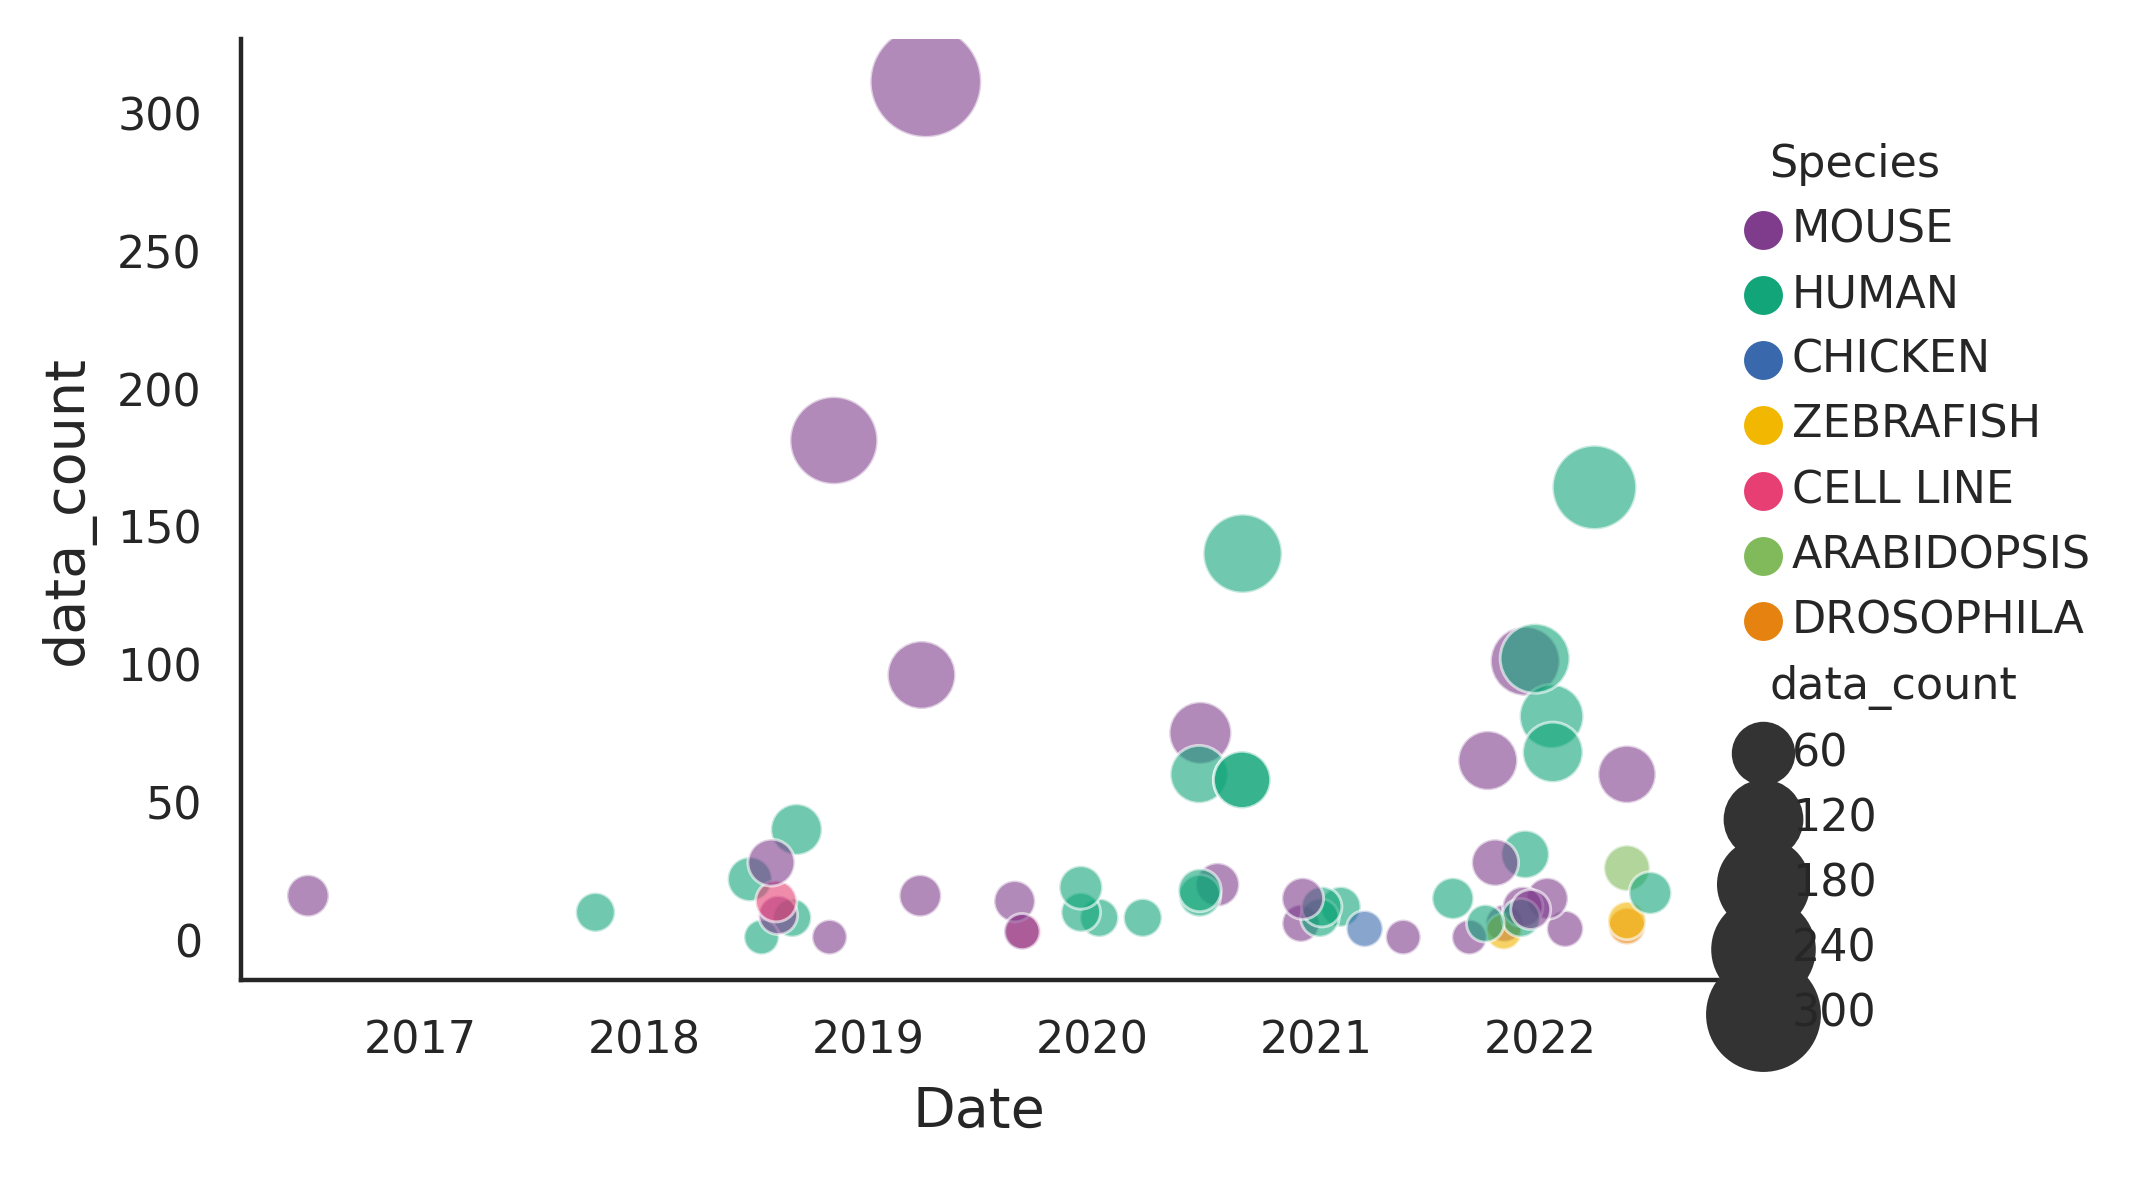

In [251]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y="data_count", 


            # y="biotech_name", 


            # hue="Biotech_ID", 
            hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.6, 
            palette=cmp[:7],
            height=3, 
            data=result,
            
            # 调节比例
            aspect=1.5
           
           )

In [223]:
np.unique(result['biotech_type'])

array(['Spatial Genomics', 'Spatial Metabolomics', 'Spatial MultiOmics',
       'Spatial Proteomics', 'Spatial Transcriptomics'], dtype=object)

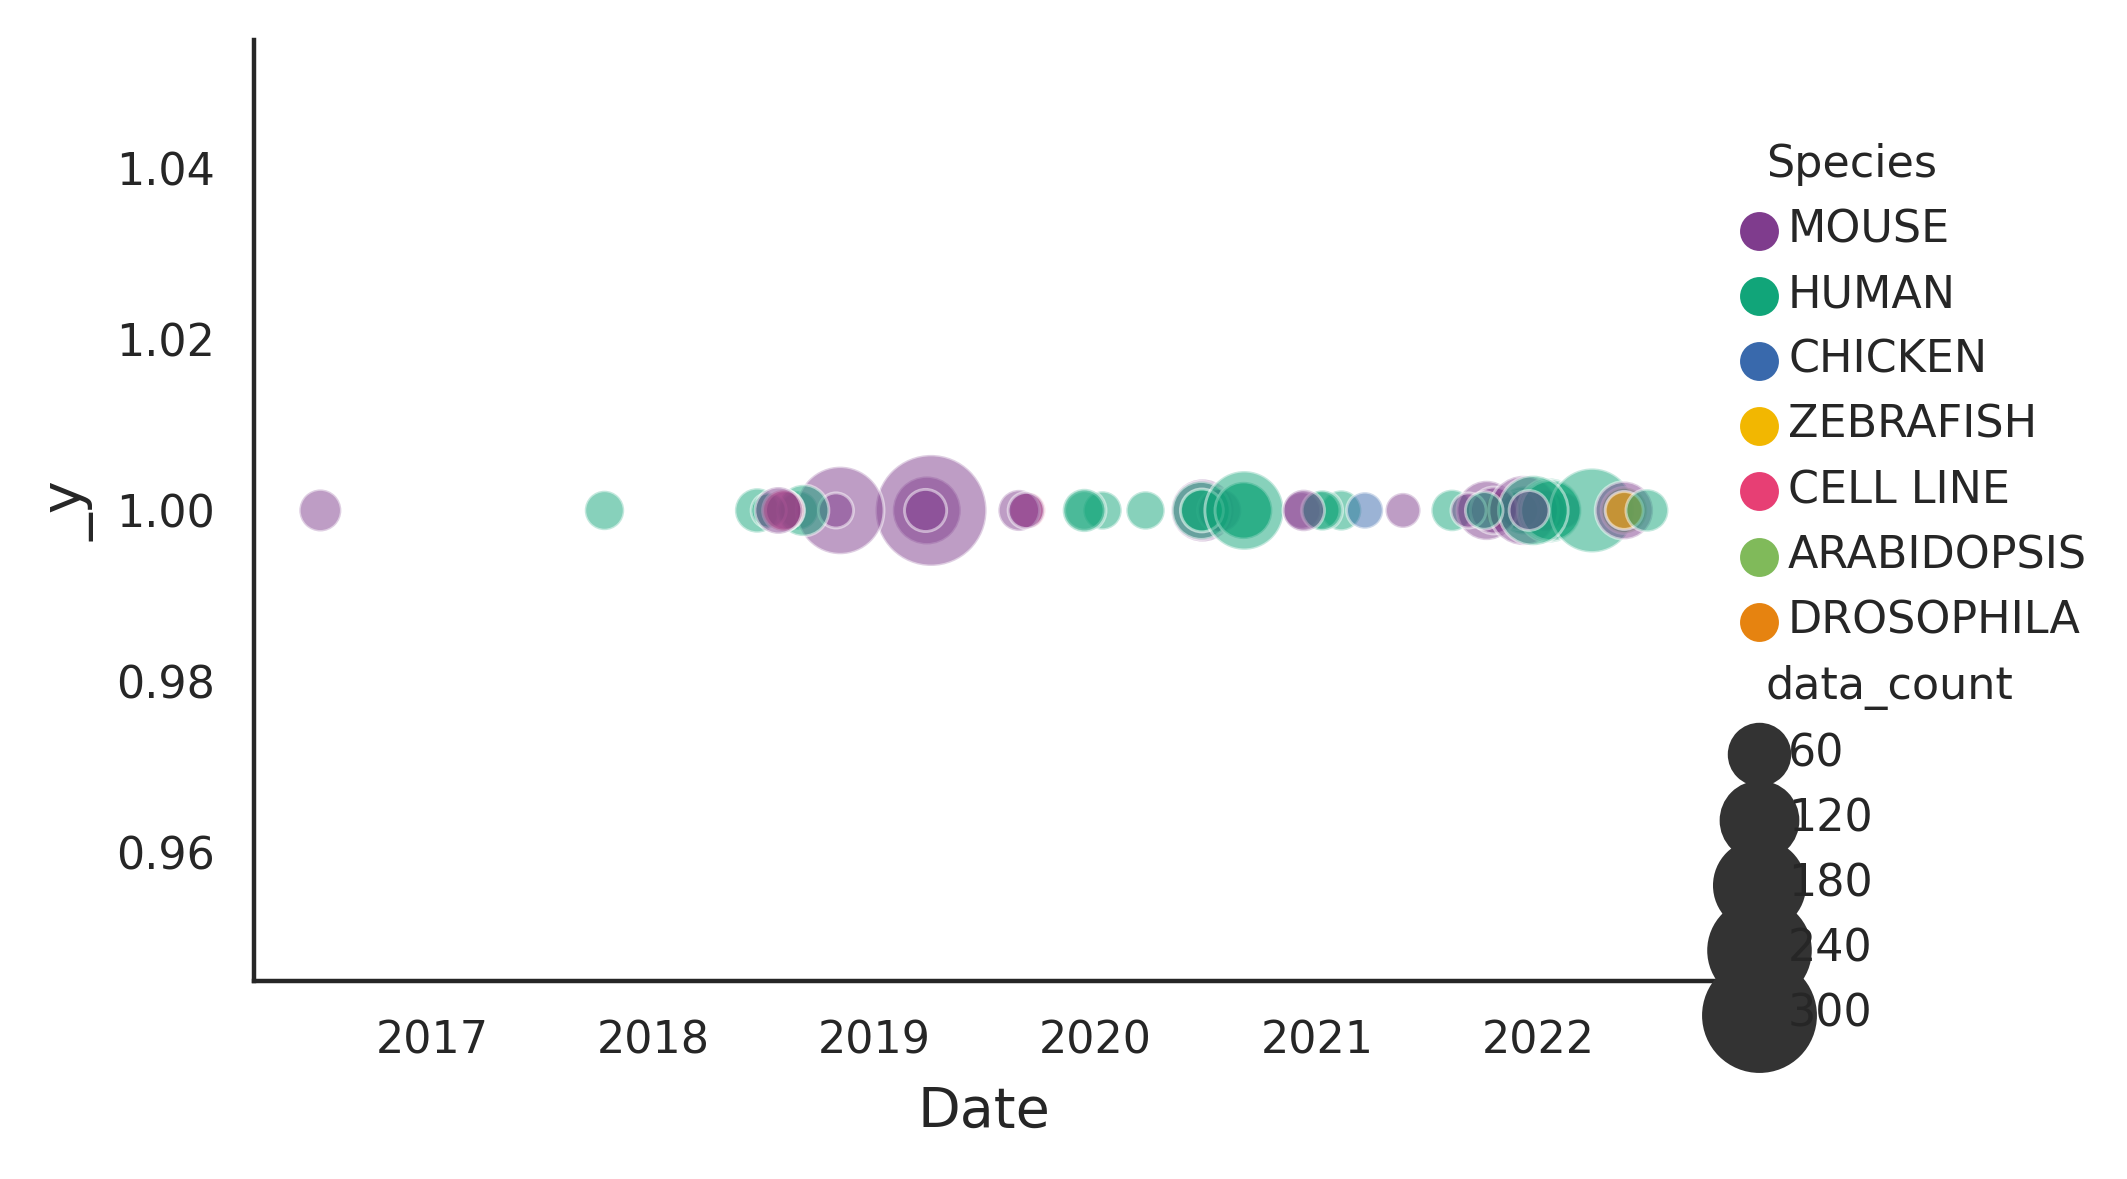

In [230]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            palette=cmp[:7],
            height=3, 
            data=result,
            
            # 调节比例
            aspect=1.5
           
           )

In [213]:
result.columns

Index(['index', 'Name_Short', 'Name_Long', 'Biotech_ID', 'doi', 'Date',
       'Country', 'Journal', 'Author', 'Access', 'Zip_Path', 'data_count',
       'N_Unit', 'N_Gene', 'Species', 'N_Unit_log', 'N_Gene_log',
       'biotech_name', 'biotech_type', 'data_count_trun_100'],
      dtype='object')

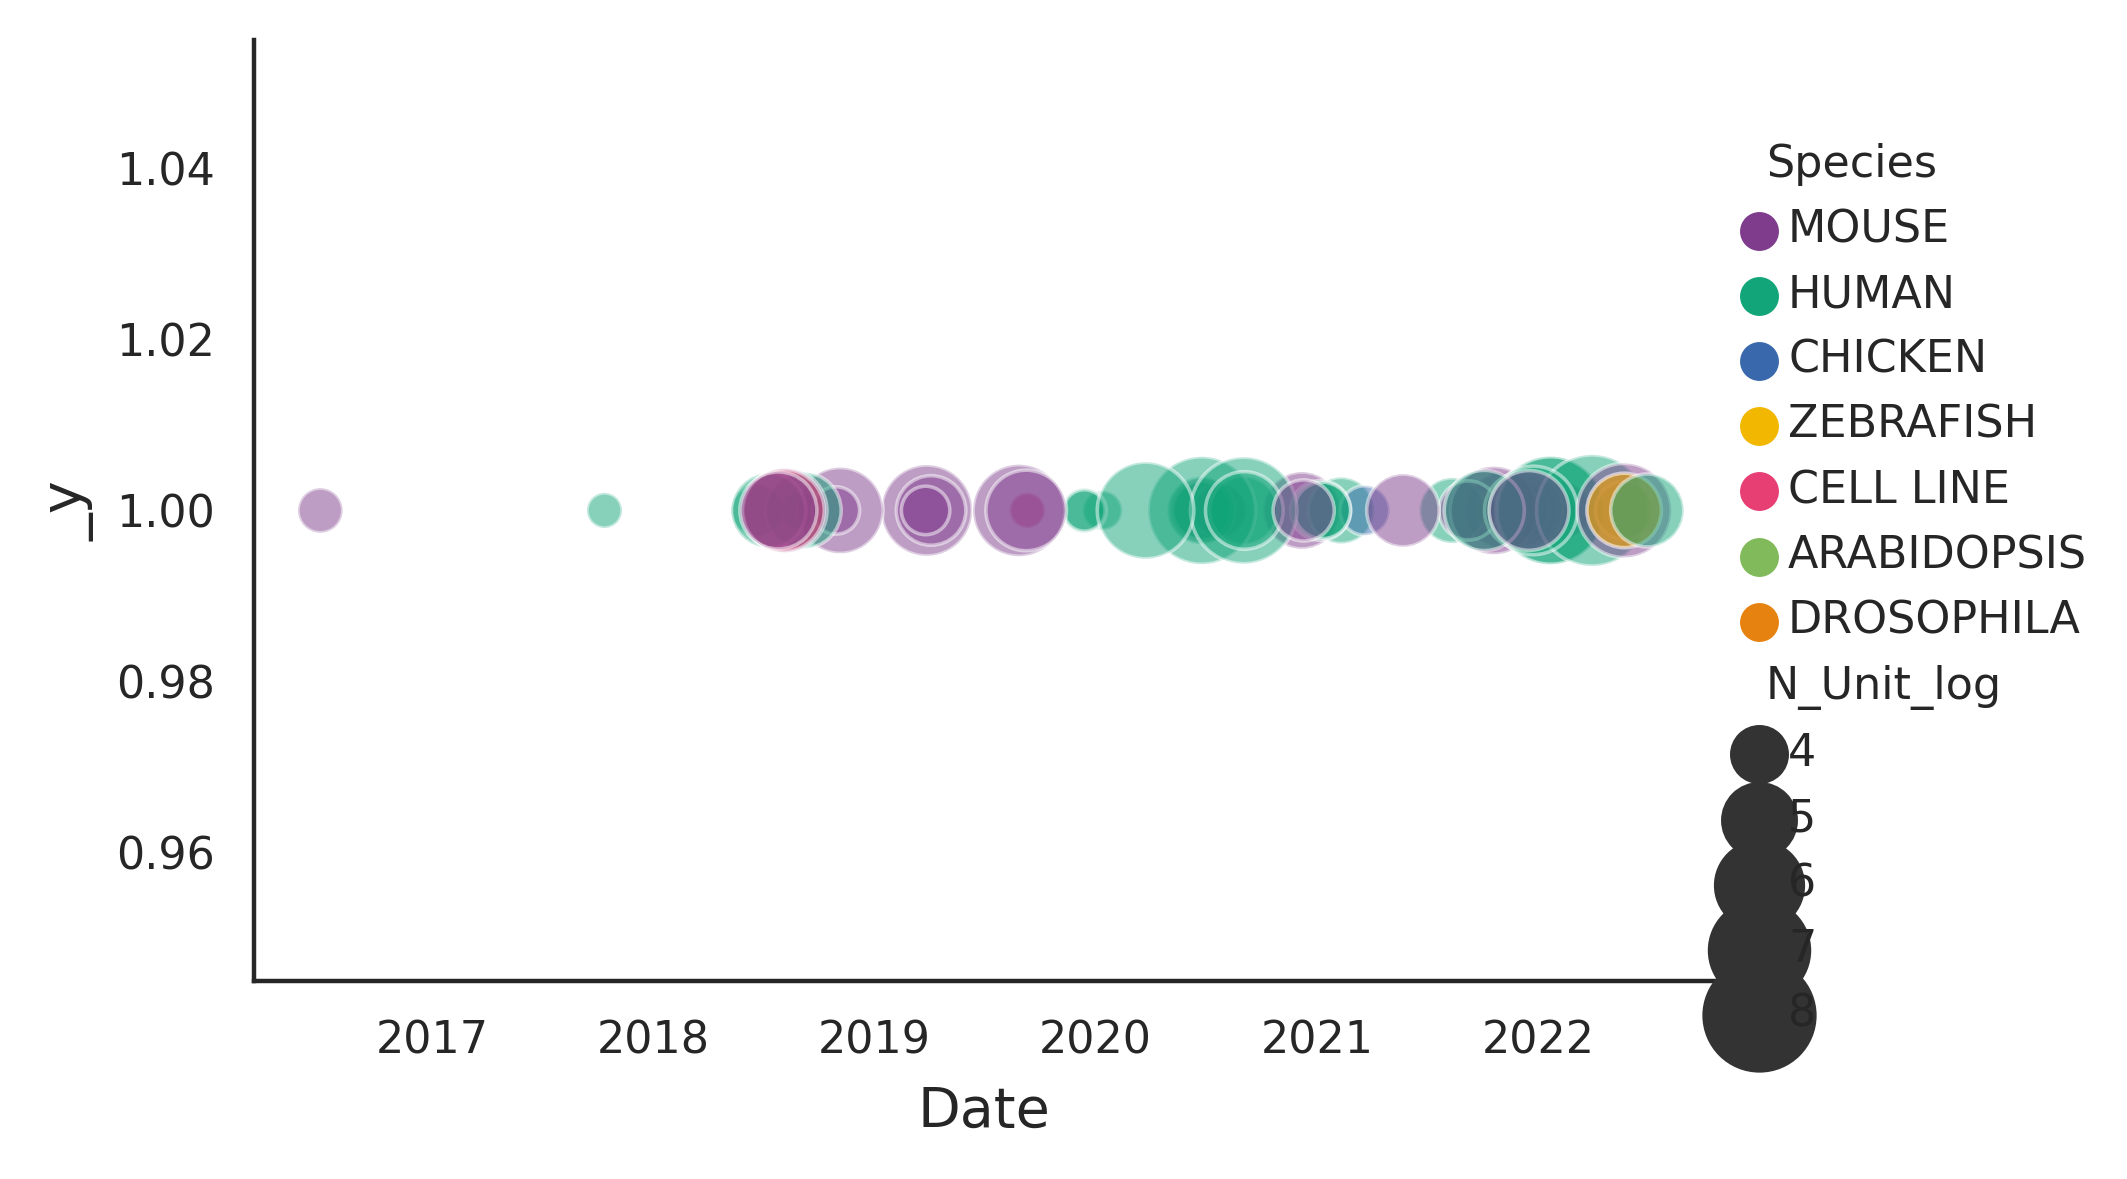

In [231]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="Biotech_ID", 
            hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="N_Unit_log",


            sizes=(40, 400), 
            alpha=.5, 
            palette=cmp[:7],
            height=3, 
            data=result,
            
            # 调节比例
            aspect=1.5
           
           )

In [233]:
result['biotech_type']

0     Spatial Transcriptomics
1     Spatial Transcriptomics
2     Spatial Transcriptomics
3     Spatial Transcriptomics
4     Spatial Transcriptomics
5     Spatial Transcriptomics
6     Spatial Transcriptomics
7     Spatial Transcriptomics
8     Spatial Transcriptomics
9     Spatial Transcriptomics
10    Spatial Transcriptomics
11    Spatial Transcriptomics
12    Spatial Transcriptomics
13    Spatial Transcriptomics
14    Spatial Transcriptomics
15    Spatial Transcriptomics
16    Spatial Transcriptomics
17    Spatial Transcriptomics
18    Spatial Transcriptomics
19    Spatial Transcriptomics
20    Spatial Transcriptomics
21    Spatial Transcriptomics
22    Spatial Transcriptomics
23    Spatial Transcriptomics
24    Spatial Transcriptomics
25    Spatial Transcriptomics
26    Spatial Transcriptomics
27    Spatial Transcriptomics
28    Spatial Transcriptomics
29    Spatial Transcriptomics
30    Spatial Transcriptomics
31    Spatial Transcriptomics
32    Spatial Transcriptomics
33    Spat

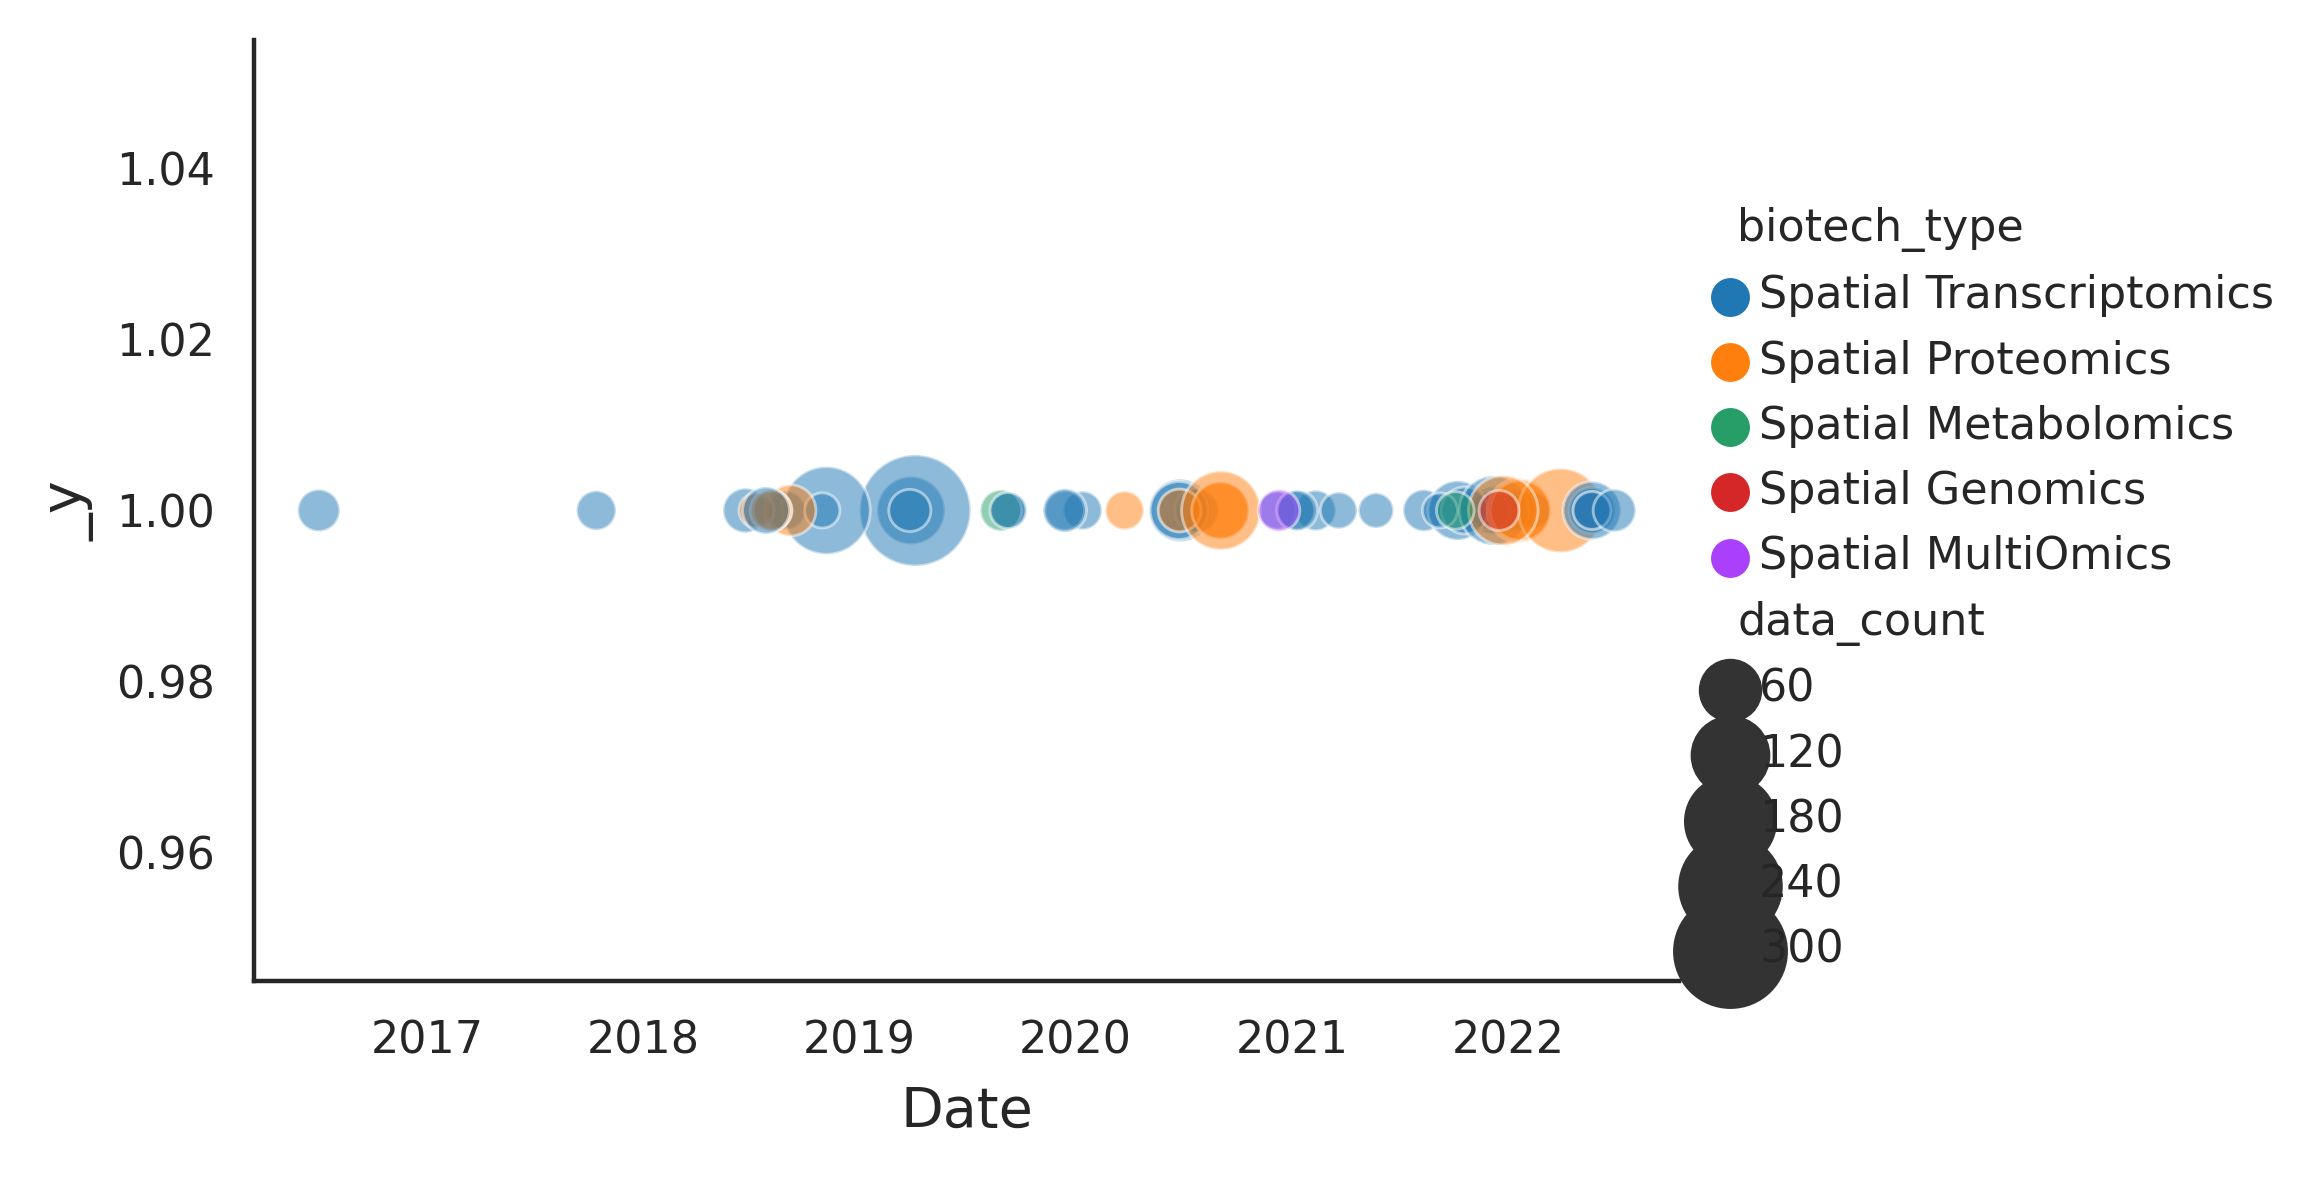

In [242]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            # hue="Species", 
            hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            # palette=cmp[:7],
            height=3, 
            # data=result[result.biotech_type=='Spatial Transcriptomics'],
            data = result,
            
            # 调节比例
            aspect=1.5
           
           )

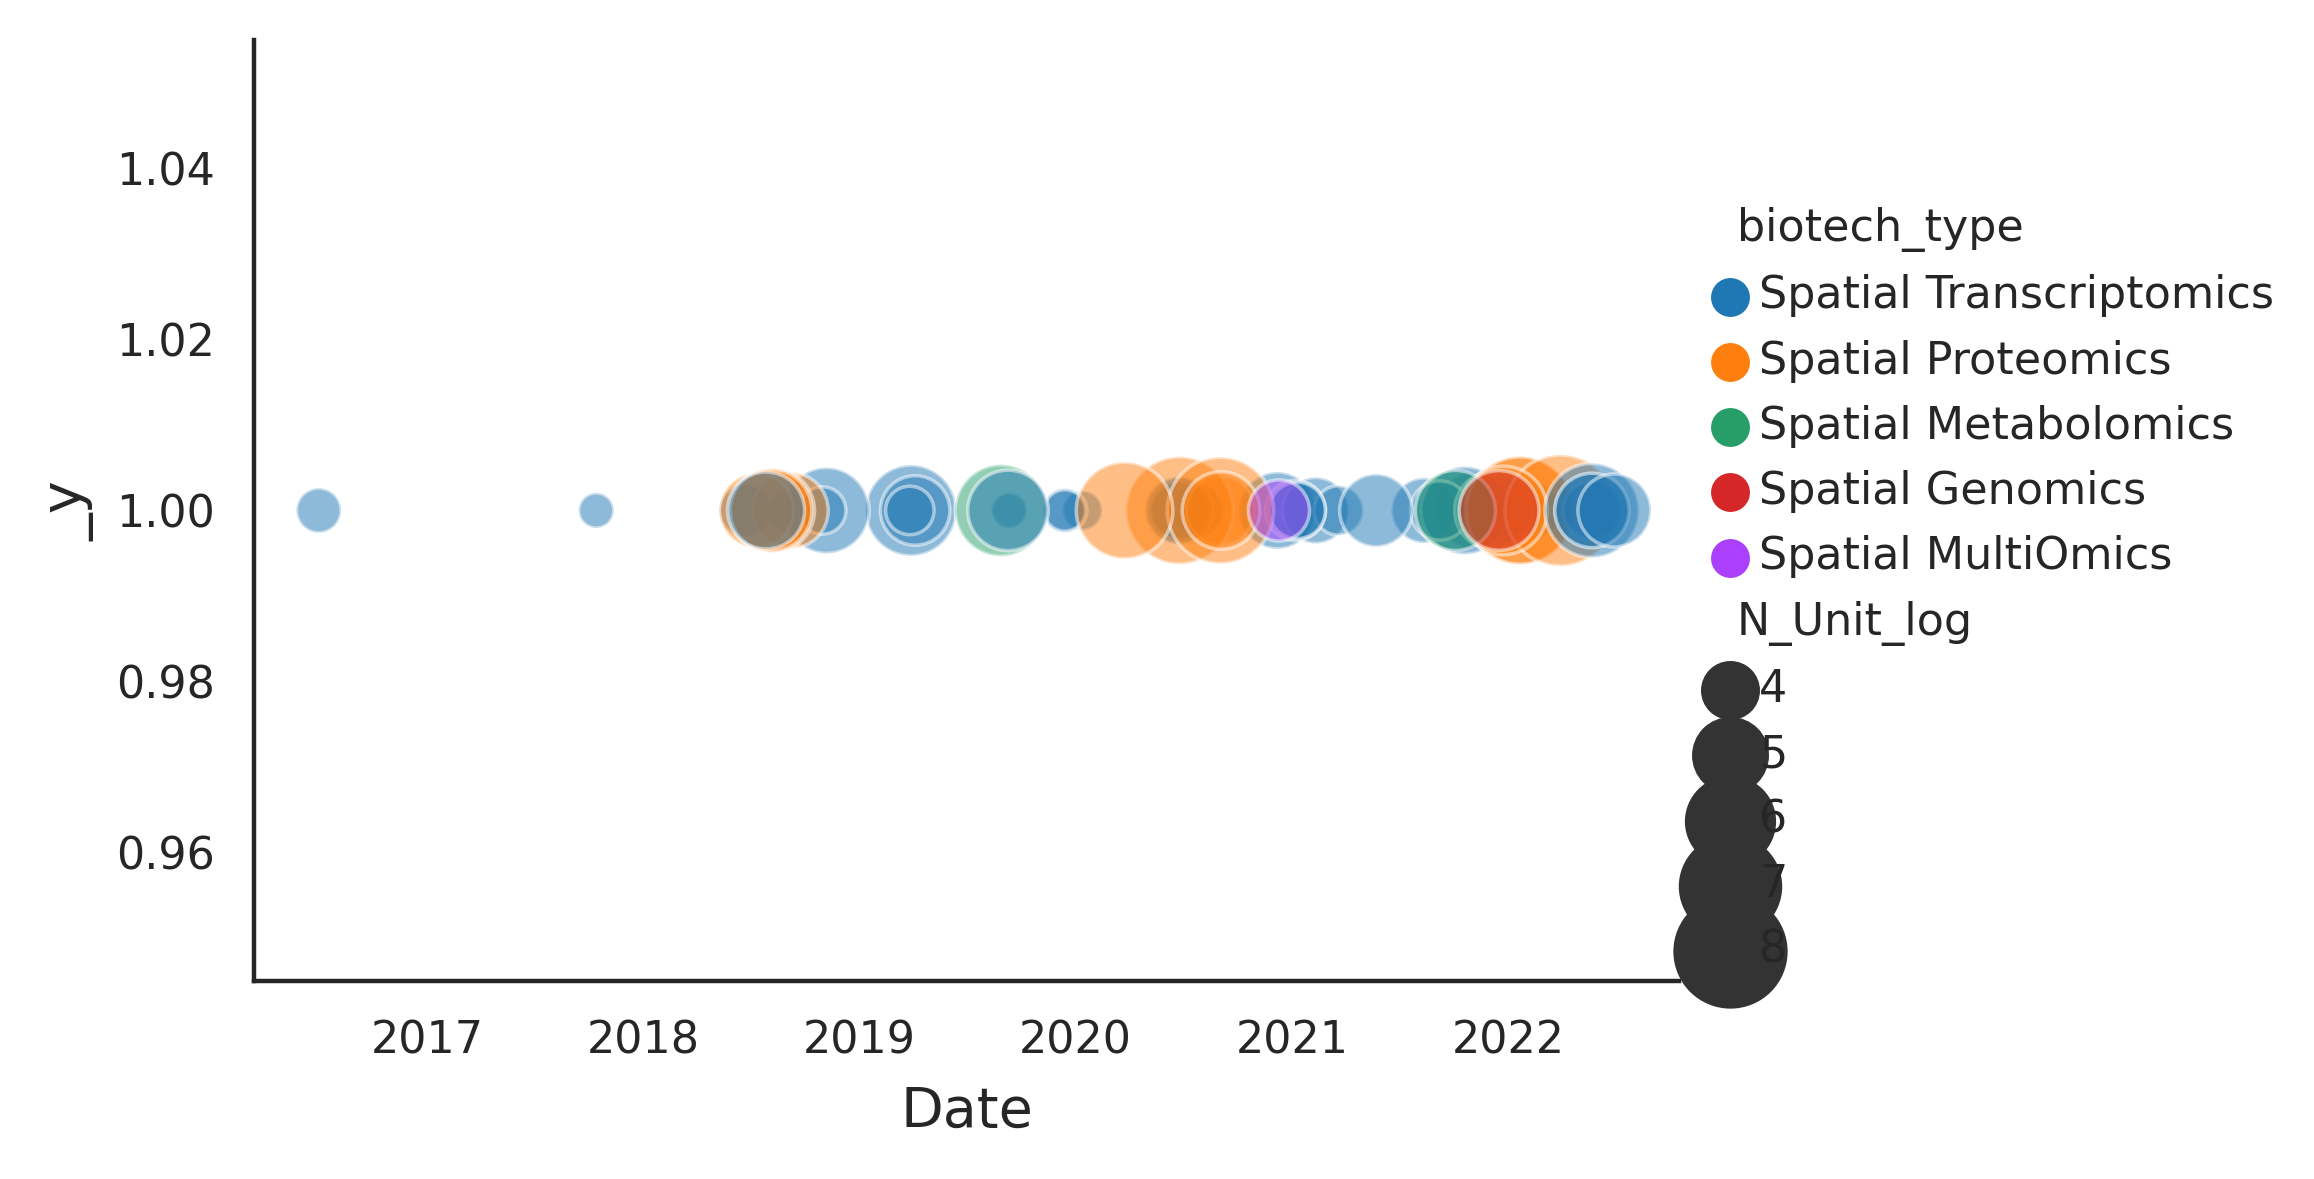

In [243]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            # hue="Species", 
            hue="biotech_type", 




            # size="data_count",
            size="N_Unit_log",


            sizes=(40, 400), 
            alpha=.5, 
            # palette=cmp[:7],
            height=3, 
            # data=result[result.biotech_type=='Spatial Transcriptomics'],
            data = result,
            
            # 调节比例
            aspect=1.5
           
           )

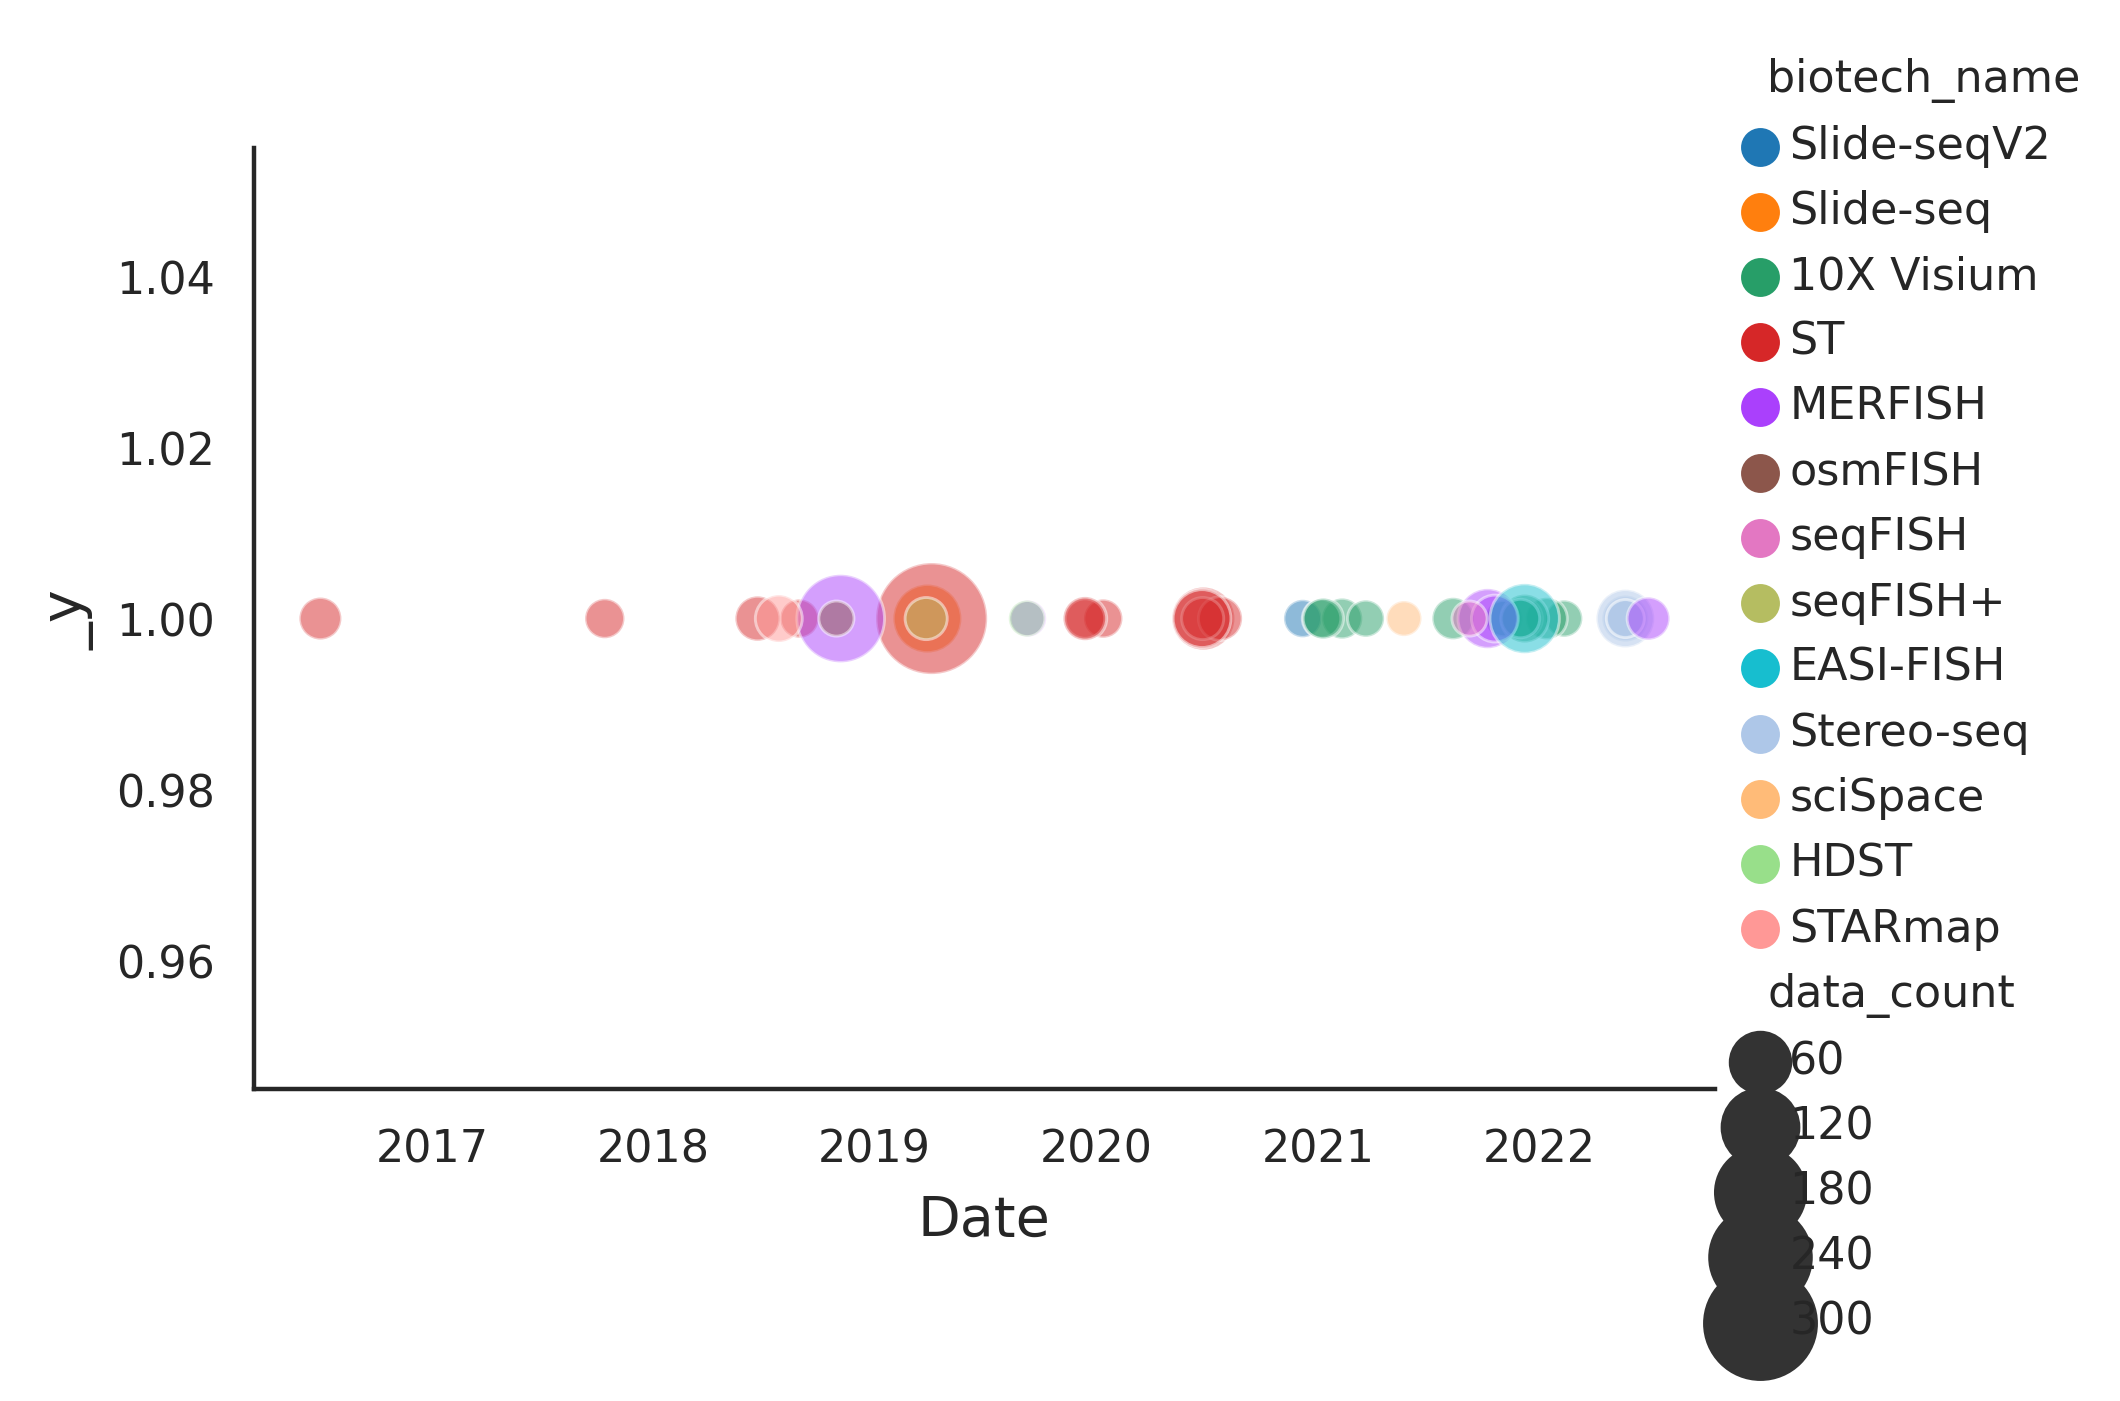

In [245]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            hue="biotech_name", 
            # hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            # palette=cmp[:7],
            height=3, 
            data=result[result.biotech_type=='Spatial Transcriptomics'],
            # data = result,
            
            # 调节比例
            aspect=1.5
           
           )

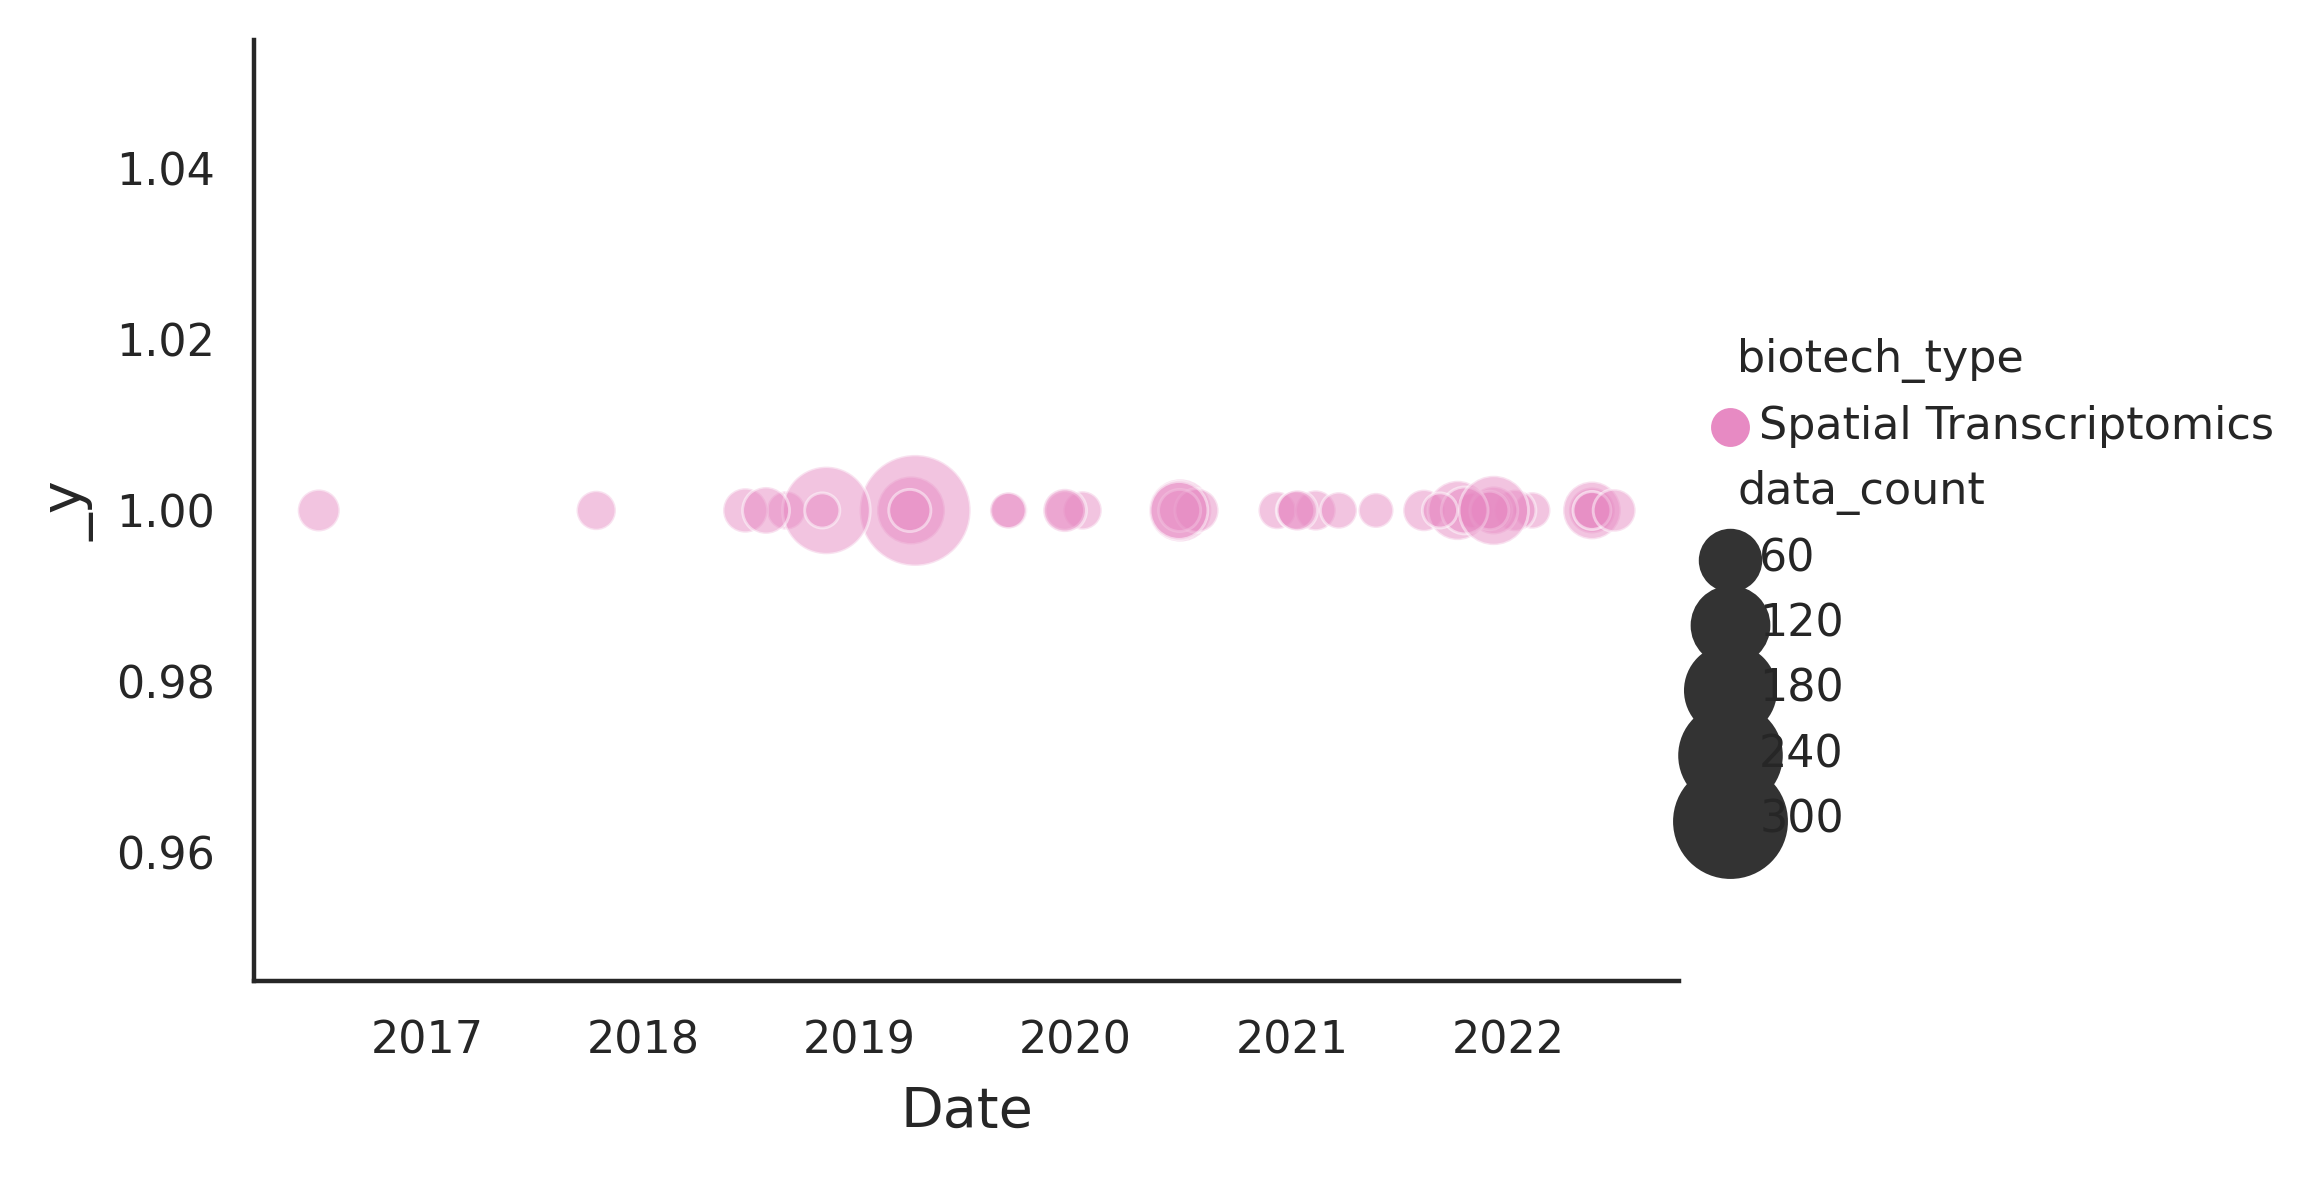

In [270]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            # hue="Species", 
            hue="biotech_type", 
            # hue=trans_color,




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            palette=[cmp_omics[0]],
            height=3, 
            data=result[result.biotech_type=='Spatial Transcriptomics'],
            # data = result,
            
            # 调节比例
            aspect=1.5
           
           )

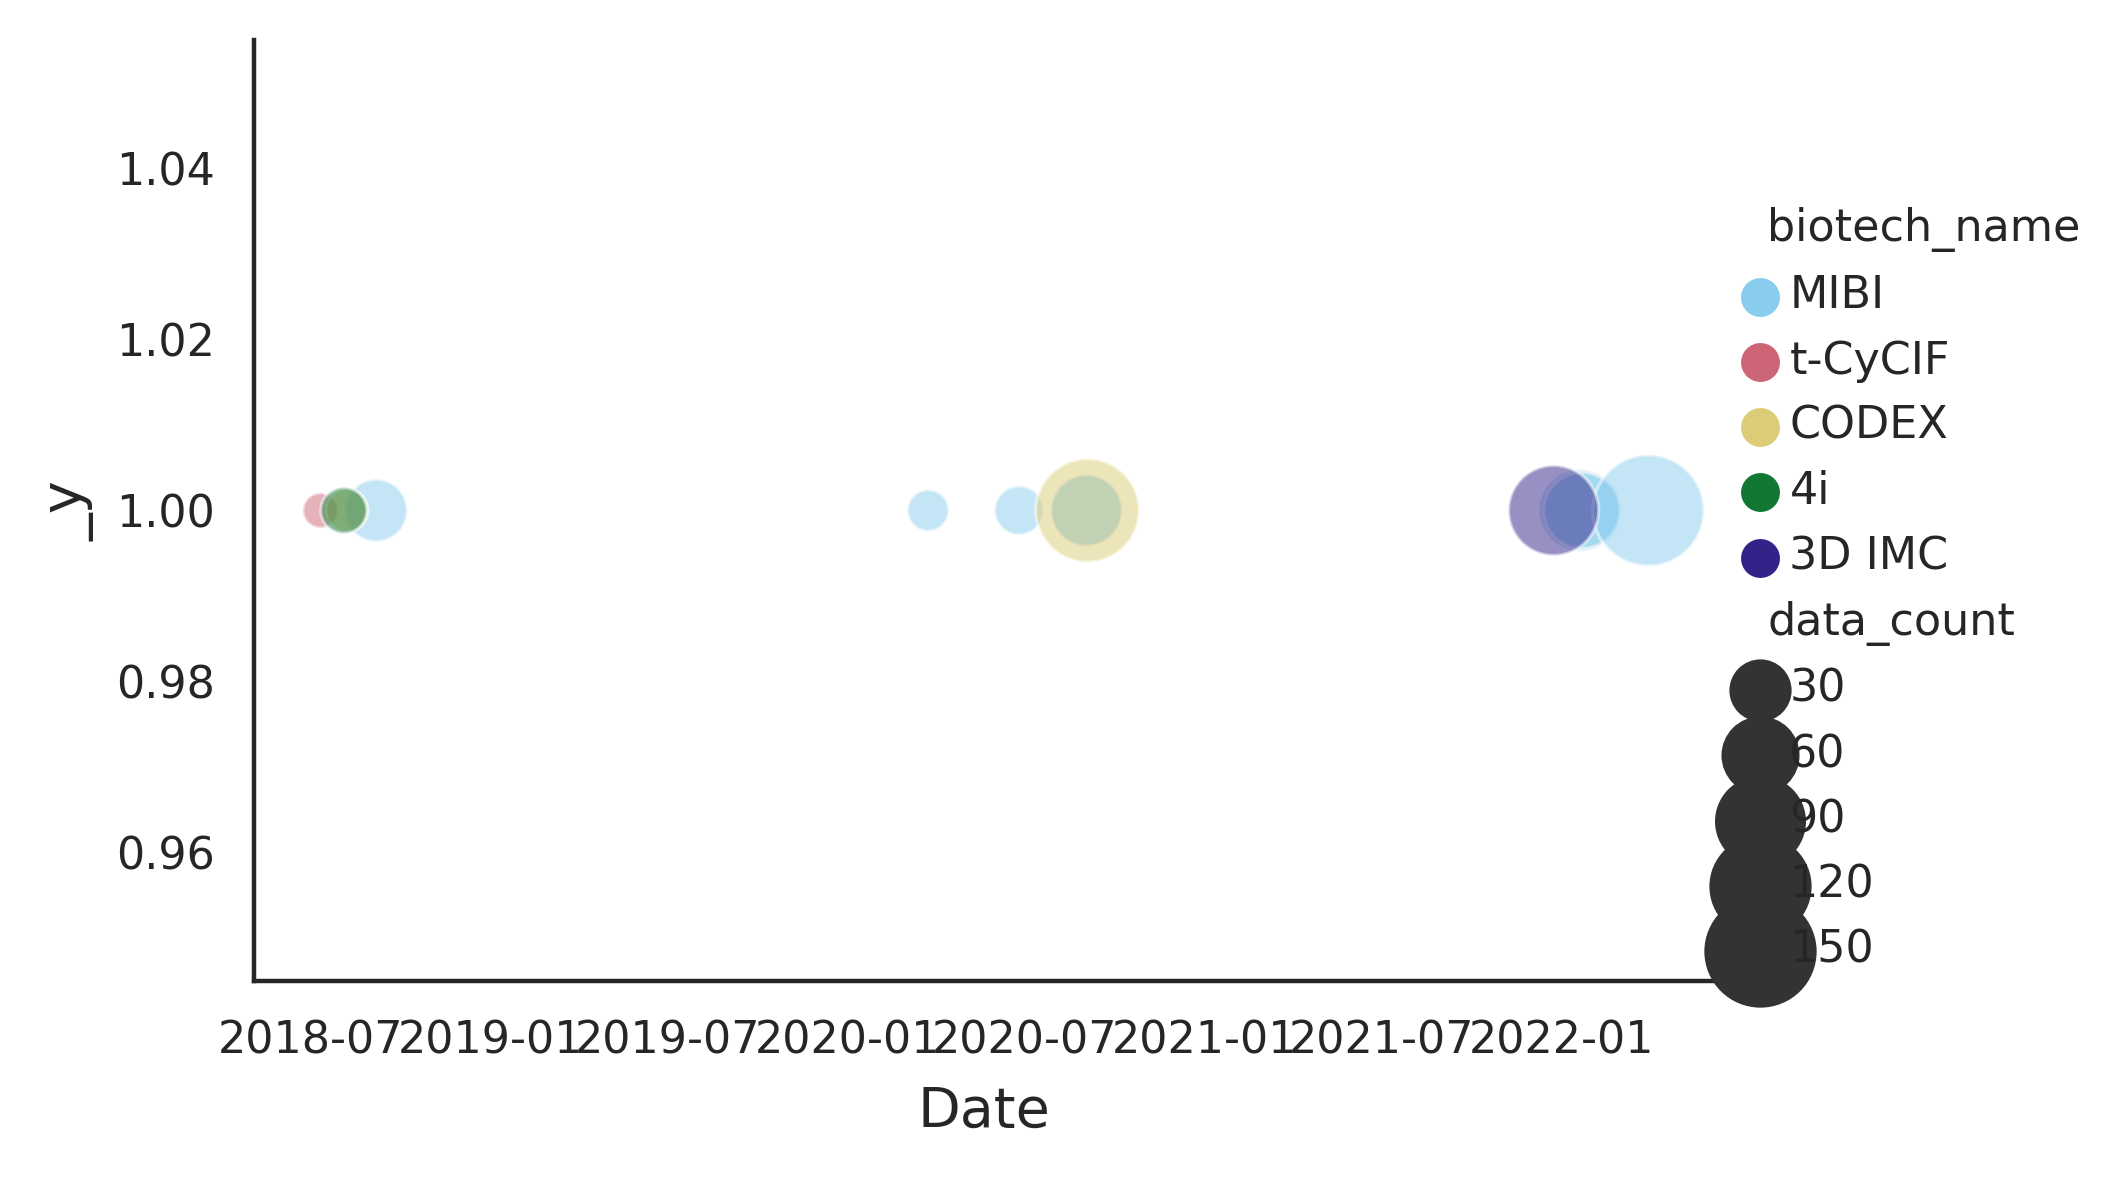

In [249]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            hue="biotech_name", 
            # hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            palette=cmp2[:5],
            height=3, 
            data=result[result.biotech_type=='Spatial Proteomics'],
            # data = result,
            
            # 调节比例
            aspect=1.5
           
           )

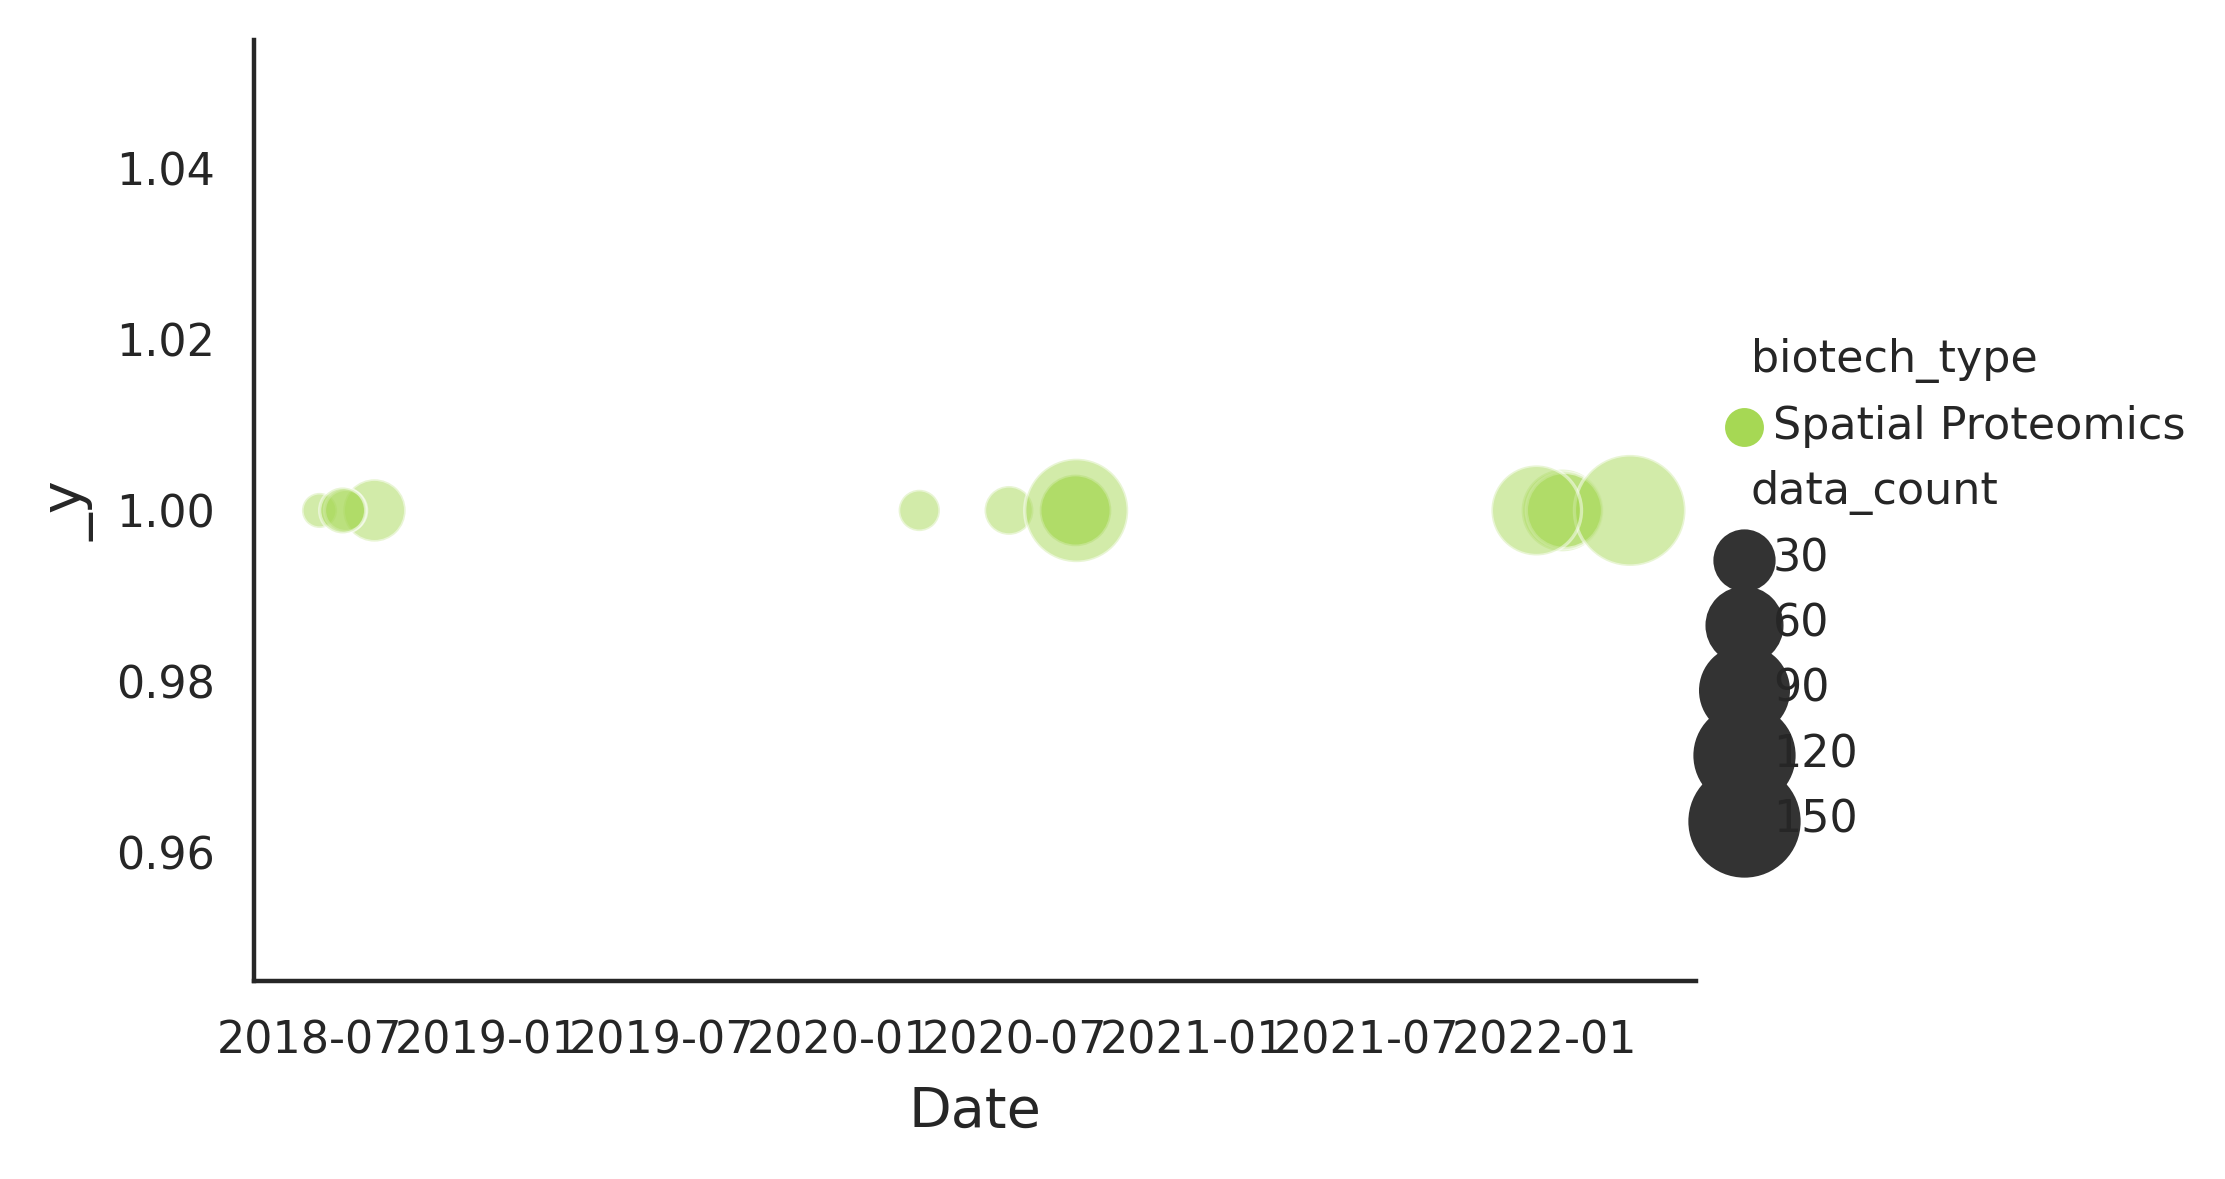

In [269]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            # hue="Species", 
            hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            # palette=cmp2[:5],
            palette=[cmp_omics[1]],
            height=3, 
            data=result[result.biotech_type=='Spatial Proteomics'],
            # data = result,
            
            # 调节比例
            aspect=1.5
           
           )

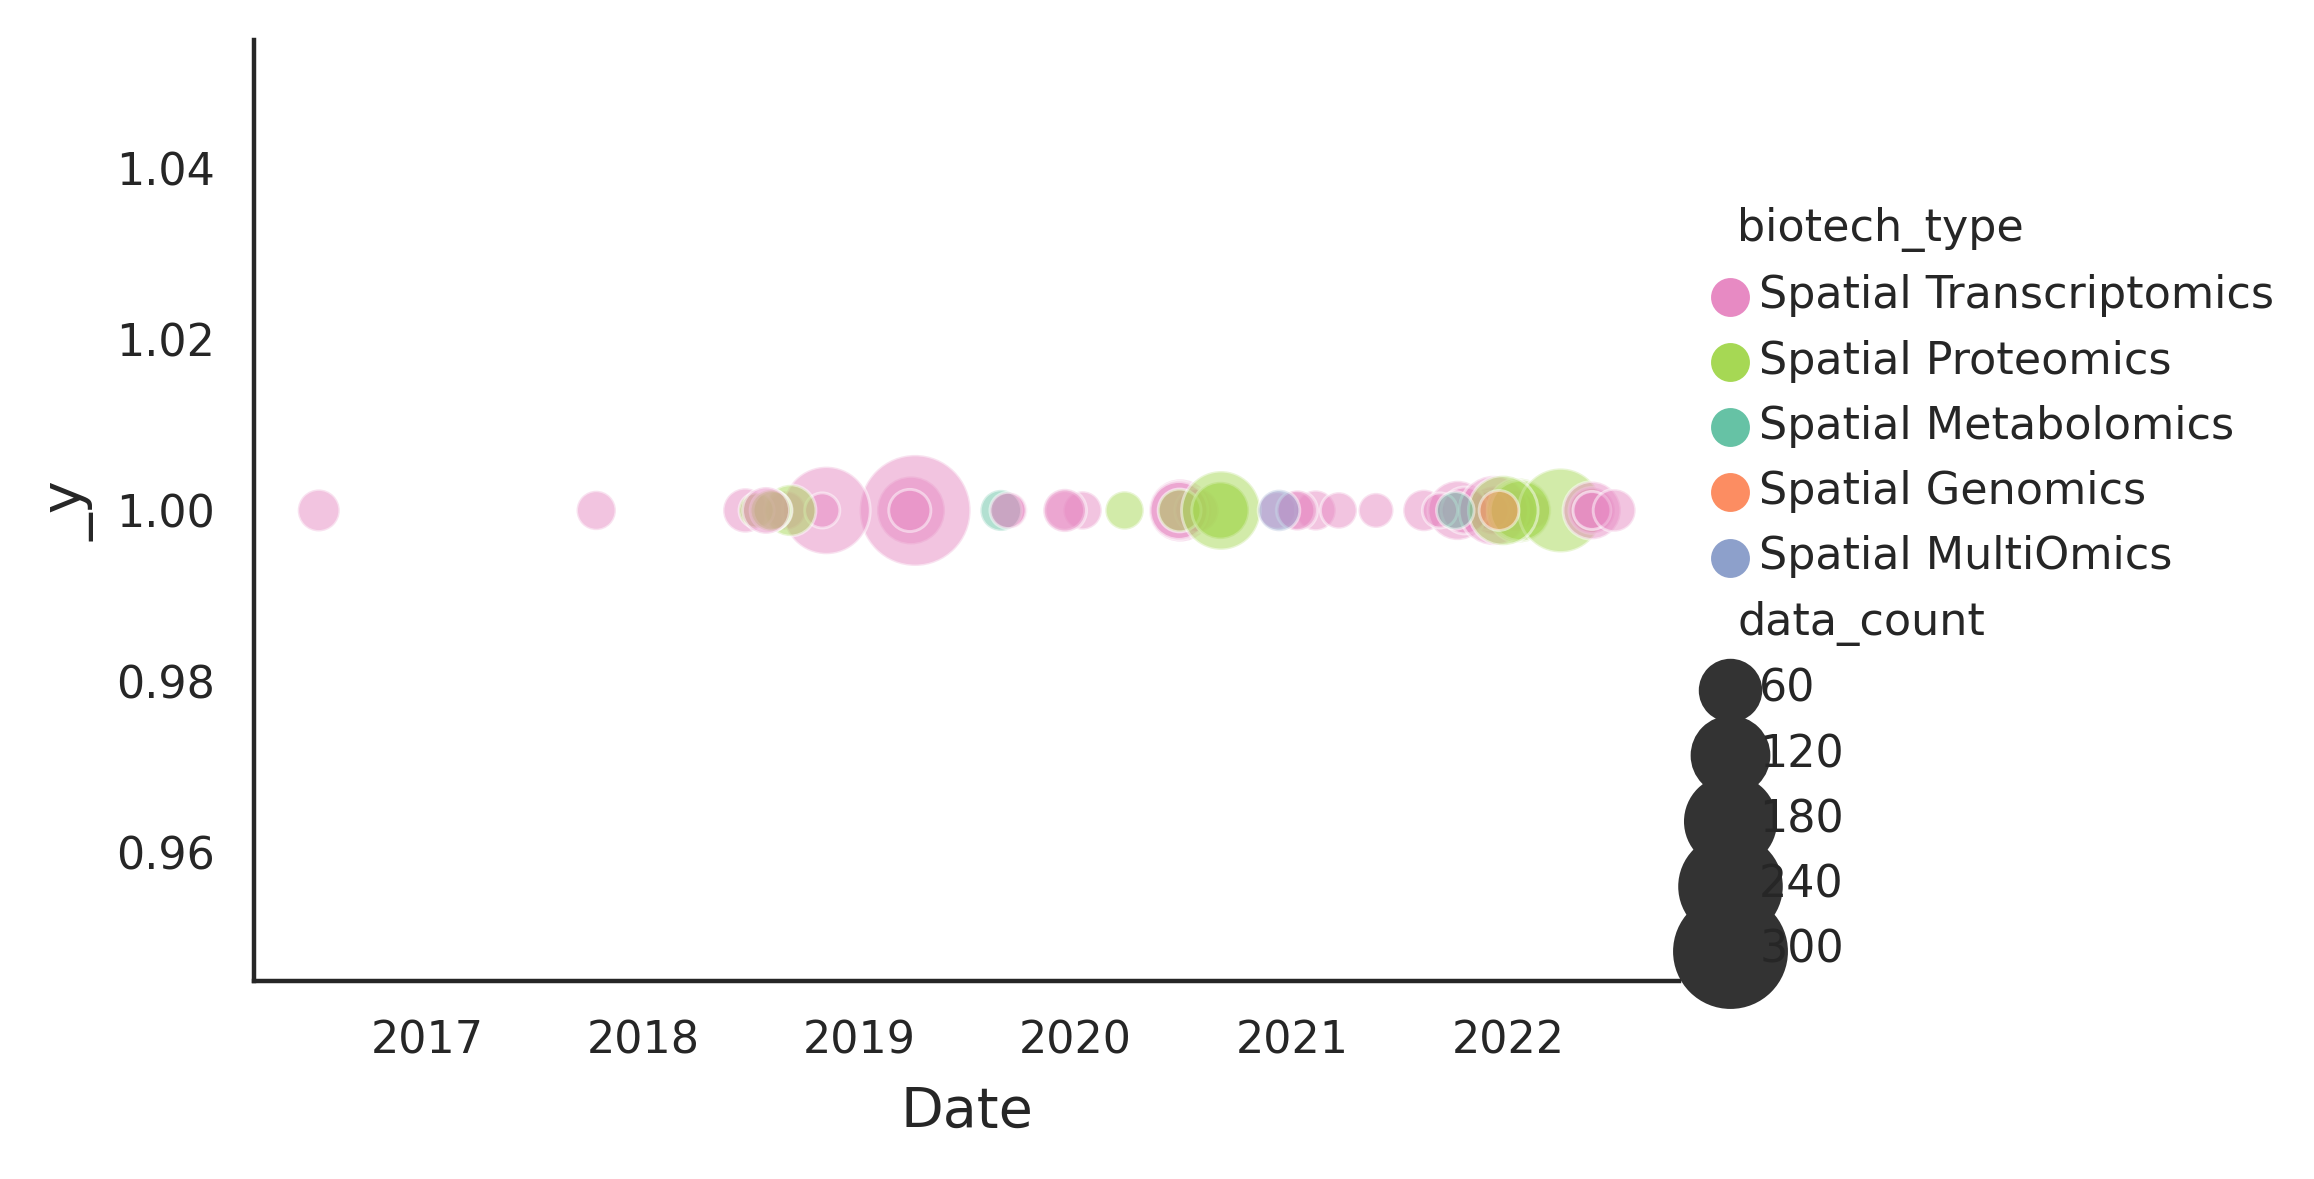

In [268]:
# result = pd.read_feather('dataset.feather')
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y=1, 


            # y="biotech_name", 


            # hue="biotech_name", 
            # hue="Species", 
            hue="biotech_type", 




            # size="data_count",
            size="data_count",


            sizes=(40, 400), 
            alpha=.5, 
            palette=cmp_omics[:5],
            height=3, 
            # data=result[result.biotech_type=='Spatial Transcriptomics'],
            data = result,
            
            # 调节比例
            aspect=1.5
           
           )

In [1]:
from datetime import  datetime
list_of_datetime_datetime_objects = [datetime(2010, 6, 14), datetime(1974, 2, 8), datetime(1974, 2, 8)]

In [2]:
from matplotlib.dates import date2num, num2date
num_dates = [date2num(d) for d in list_of_datetime_datetime_objects]

In [3]:
import numpy
histo = numpy.histogram(num_dates)

In [12]:
histo

(array([2, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([ 1499. ,  2826.5,  4154. ,  5481.5,  6809. ,  8136.5,  9464. ,
        10791.5, 12119. , 13446.5, 14774. ]))

In [4]:
cumulative_histo_counts = histo[0].cumsum()

In [5]:
from matplotlib import pyplot

<BarContainer object of 10 artists>

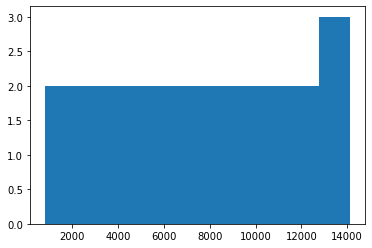

In [6]:
bin_size = histo[1][1]-histo[1][0]
pyplot.bar(histo[1][:-1], cumulative_histo_counts, width=bin_size)

In [10]:
histo[1][1:]

array([ 2826.5,  4154. ,  5481.5,  6809. ,  8136.5,  9464. , 10791.5,
       12119. , 13446.5, 14774. ])

In [11]:
cumulative_histo_counts

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

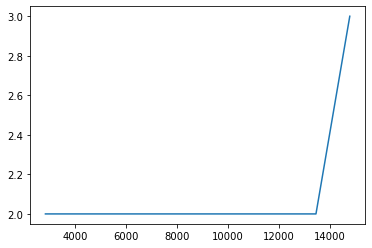

In [7]:
pyplot.plot(histo[1][1:], cumulative_histo_counts)

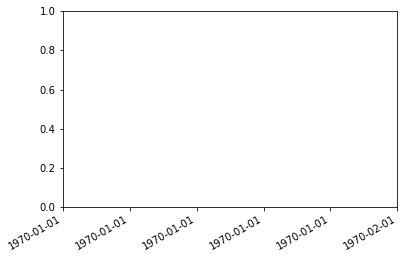

In [8]:
from matplotlib import ticker

# The format for the x axis is set to the chosen string, as defined from a numerical date:
pyplot.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda numdate, _: num2date(numdate).strftime('%Y-%d-%m')))
# The formatting proper is done:
pyplot.gcf().autofmt_xdate()
# To show the result:
pyplot.show()  # or draw(), if you don't want to block

In [17]:
result = pd.read_feather('dataset.feather')



In [24]:
date_df = result[['Date','data_count']].sort_values('Date')

In [26]:
date_df['data_count'].cumsum()

19      16
18      26
17      48
42      49
57      77
45      91
43     100
16     108
39     148
30     149
29     330
32     346
2      442
20     753
48     767
56     770
28     773
14     783
15     802
12     810
41     818
22     878
21     894
37     912
11     987
13    1007
38    1065
36    1123
44    1263
1     1269
50    1284
9     1292
25    1304
5     1316
6     1320
55    1321
10    1336
31    1337
47    1343
26    1408
27    1436
7     1439
0     1445
24    1453
8     1465
33    1566
23    1597
49    1608
46    1710
4     1725
34    1806
35    1874
3     1878
40    2042
51    2068
52    2073
53    2133
54    2140
58    2157
Name: data_count, dtype: int64

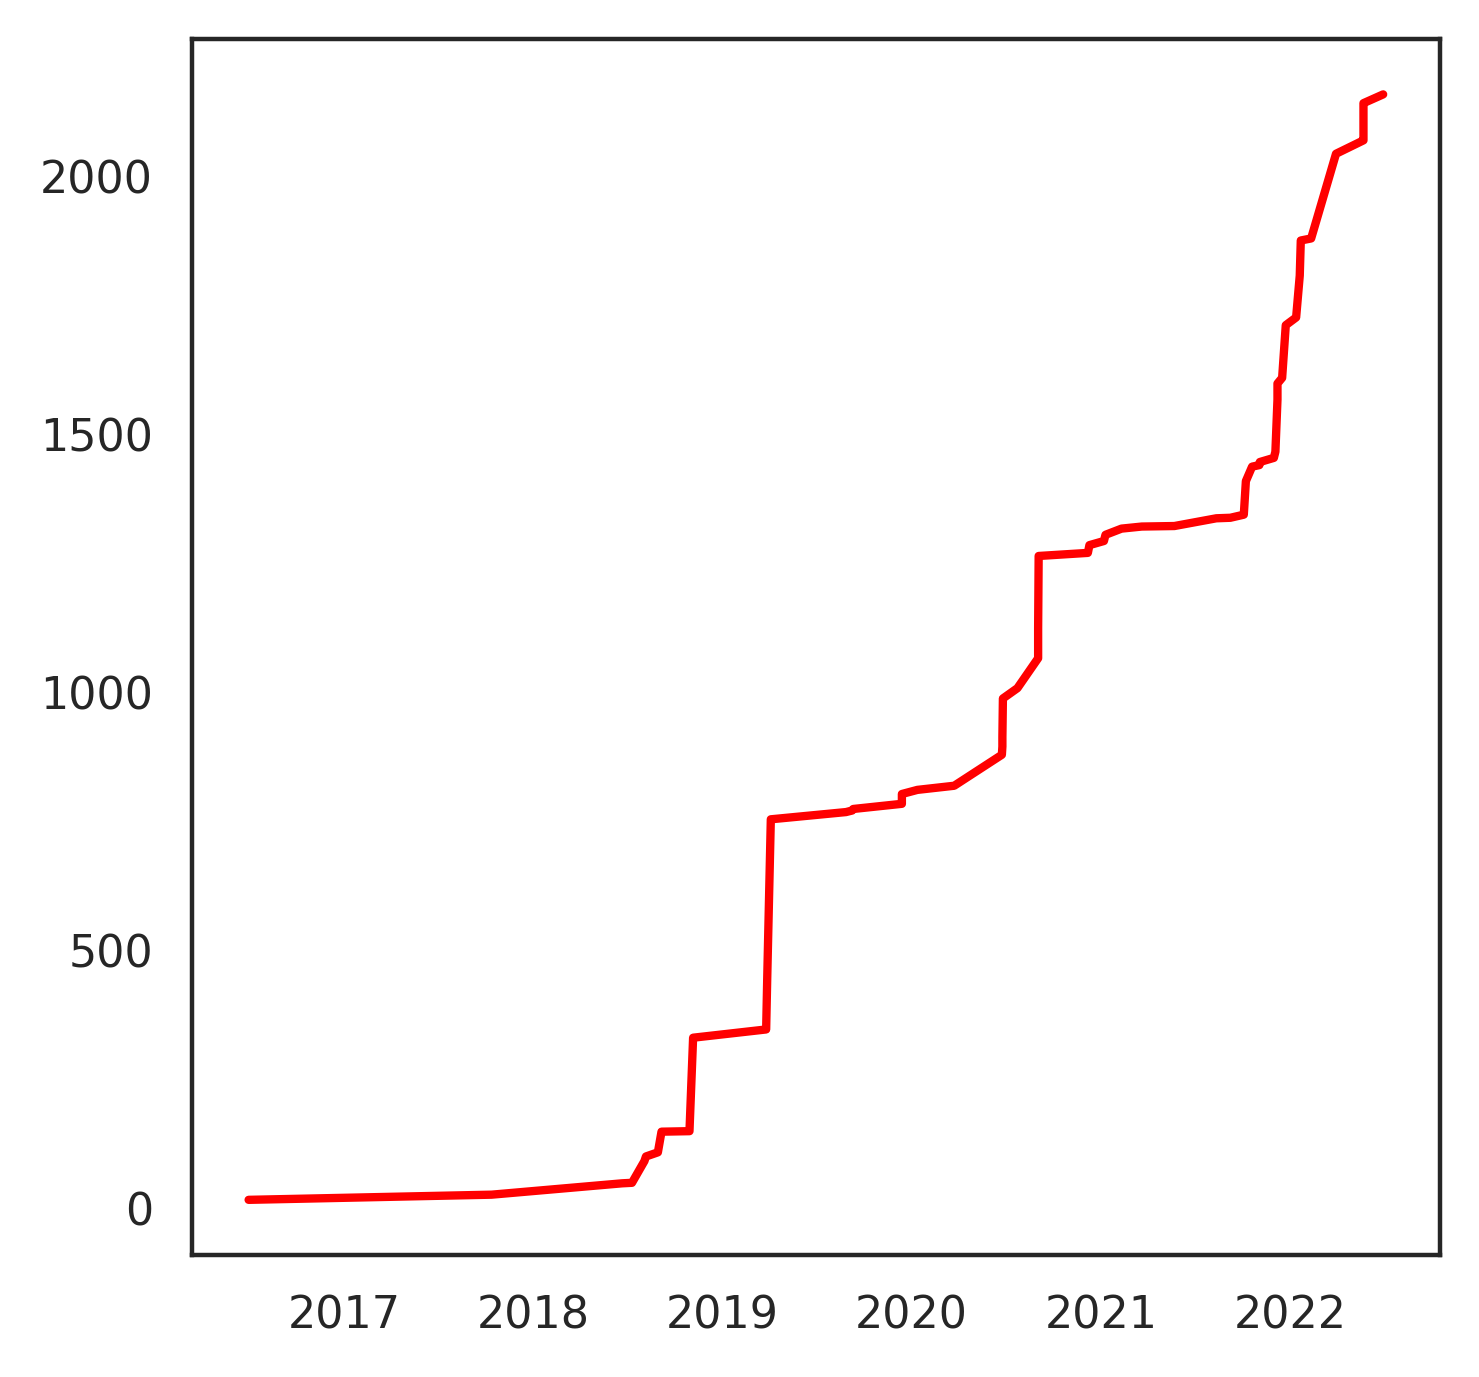

In [28]:
plt.plot(date_df['Date'],date_df['data_count'].cumsum(),color='r')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


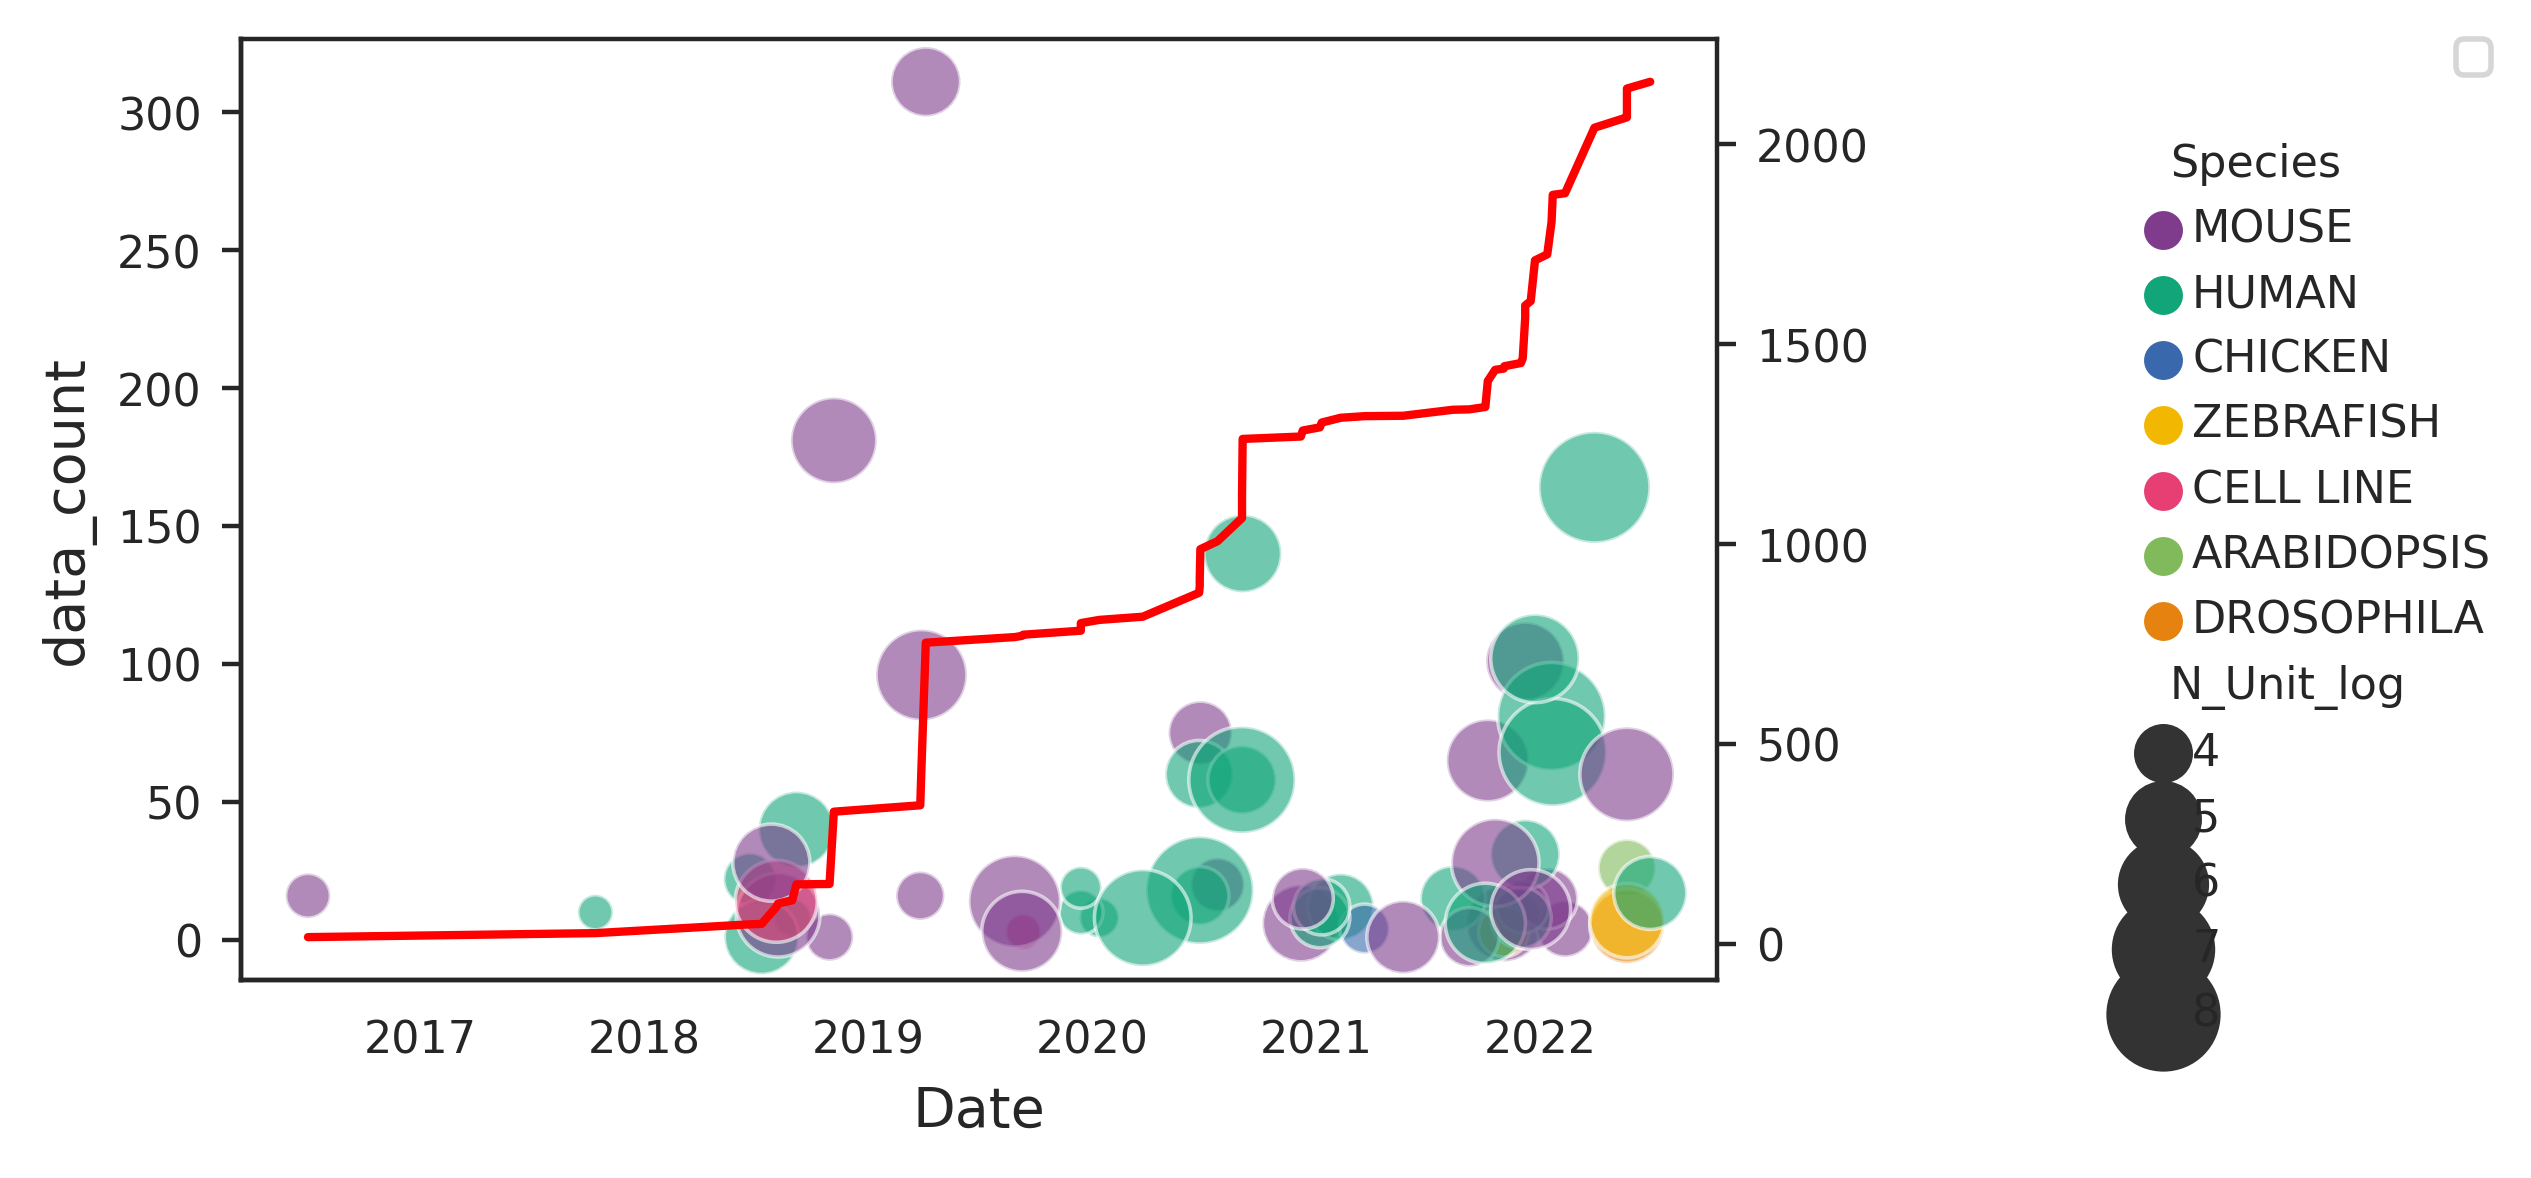

In [45]:
# fig = plt.figure()
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
sns.relplot(x="Date", 
            # y="data_count_trun_100", 
            y="data_count", 


            # y="biotech_name", 


            # hue="Biotech_ID", 
            hue="Species", 
            # hue="biotech_type", 




            # size="data_count",
            size="N_Unit_log",


            sizes=(40, 400), 
            alpha=.6, 
            palette=cmp[:7],
            height=3, 
            data=result,
            
            # 调节比例
            aspect=1.5,
            # ax=ax1,
            # show=False
           
           )
ax2 = plt.twinx()
ax2.plot(date_df['Date'],date_df['data_count'].cumsum(),color='r')

# ax._legend.remove()
# plt.legend([],[], frameon=False)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0)
plt.savefig('fig/time.png',dpi=400)
# plt.tight_layout()
# plt.show()

In [47]:
result[result.data_count>120]

,index,Name_Short,Name_Long,Biotech_ID,doi,Date,Country,Journal,Author,Access,Zip_Path,data_count,N_Unit,N_Gene,Species,N_Unit_log,N_Gene_log,biotech_name,biotech_type,data_count_trun_100
20,24,maniatis2019spatiotemporal,Spatiotemporal dynamics of molecular pathology...,27,https://doi.org/10.1126/science.aav9776,2019-04-05,USA,Science,"Maniatis, Silas\nÄijö, Tarmo\nVickovic, Sanja\...",https://als-st.nygenome.org/,None,311,76300,14990.022508,MOUSE,4.882525,4.175802,ST,Spatial Transcriptomics,100
29,34,moffitt2018molecular,"Molecular, spatial, and functional single-cell...",3,10.1126/science.aau5324,2018-11-06,USA,Science,"Moffitt, J. R.\nBambah-Mukku, D.\nEichhorn, S....",https://datadryad.org/stash/dataset/doi:10.506...,None,181,1027848,161.000000,MOUSE,6.011929,2.206826,MERFISH,Spatial Transcriptomics,100
40,48,liu2022reproducible,"Reproducible, high-dimensional imaging in arch...",2,10.1038/s41374-022-00778-8,2022-03-31,USA,Laboratory Investigation,"Liu, C. C.\nBosse, M.\nKong, A.\nKagel, A.\nKi...",https://www.angelolab.com/mibi-data,None,164,171966464,16.000000,HUMAN,8.235444,1.204120,MIBI,Spatial Proteomics,100
44,60,schurch2020coordinated,Coordinated Cellular Neighborhoods Orchestrate...,13,10.1016/j.cell.2020.07.005,2020-09-03,USA,Cell,"Schürch, Christian M.\nBhate, Salil S.\nBarlow...",https://data.mendeley.com/datasets/mpjzbtfgfr/1,None,140,258385,58.000000,HUMAN,5.412267,1.763428,CODEX,Spatial Proteomics,100


In [50]:
biotech_type_agg = result.groupby('biotech_type').agg('sum')

In [53]:
biotech_type_agg['data_count']/biotech_type_agg['data_count'].sum()

biotech_type
Spatial Genomics           0.005100
Spatial Metabolomics       0.009272
Spatial MultiOmics         0.006954
Spatial Proteomics         0.352805
Spatial Transcriptomics    0.625869
Name: data_count, dtype: float64

In [54]:
(0.352805+0.625869)*100

97.8674